In [77]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from scipy.optimize import curve_fit
import matplotlib.animation as ani
import matplotlib.ticker as ticker
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline

timestep=2 #ns, must be the same for the two files
thickness_of_sample=110500*0.0001 #micrometers
energy_impulse=500 #mJ/cm^2
maxTempReached=1300 #K, is written in the end line of file .mlt
filename1='GE0.5.td'
filename2='GE0.5.mlt'

In [39]:
#non c'è bisogno di ricompilarlo se il file non è nuovo

with open(filename1, mode='r+') as f:
    d = f.readlines()
    f.seek(0)
    for i in d:
        if i[0] != 'C':
            f.write(i)
    f.truncate()

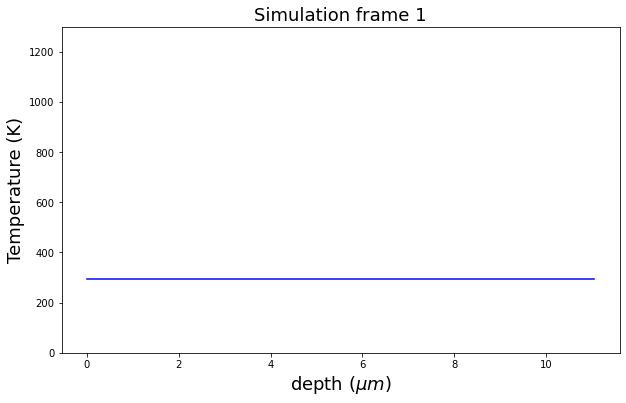

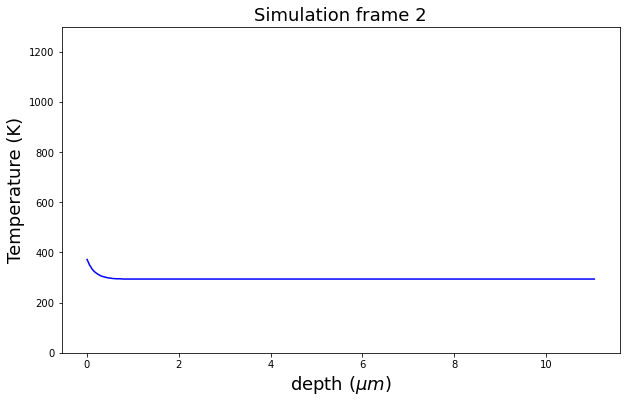

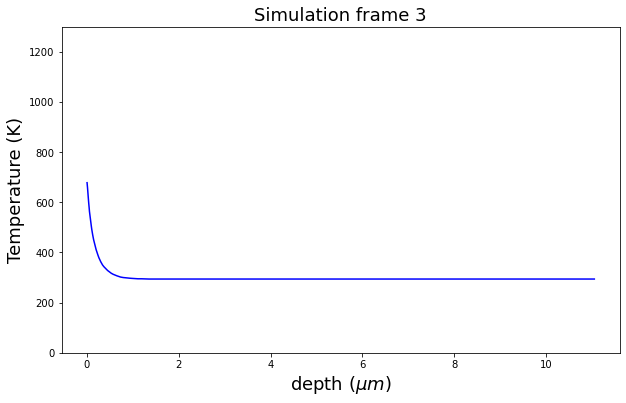

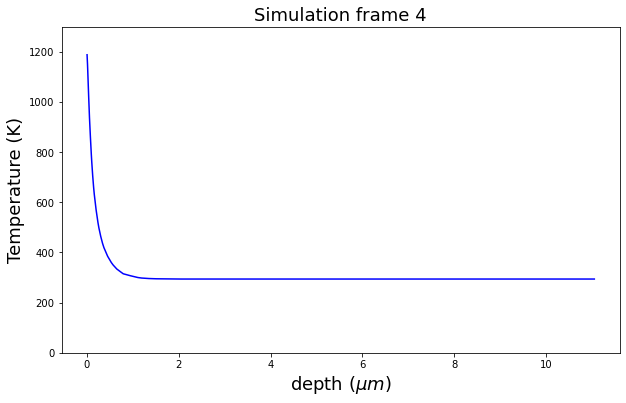

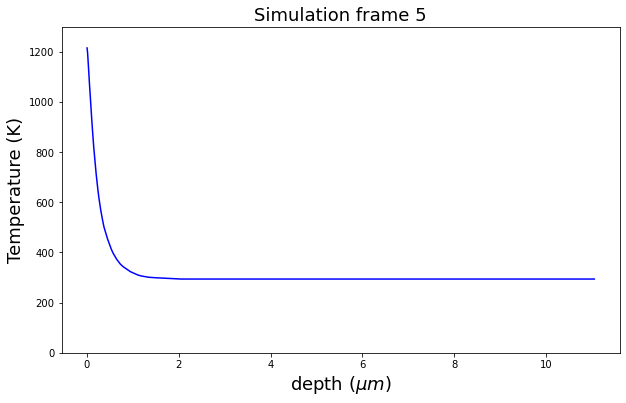

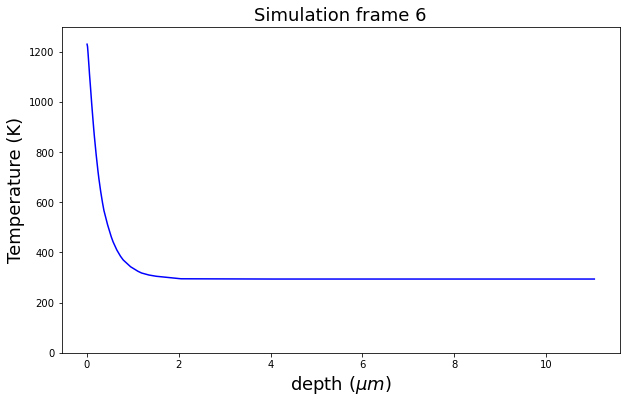

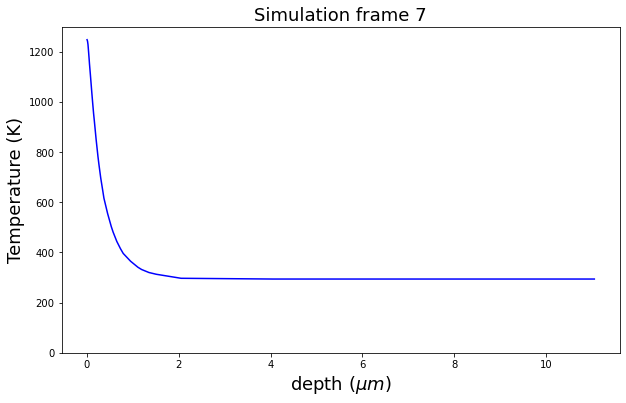

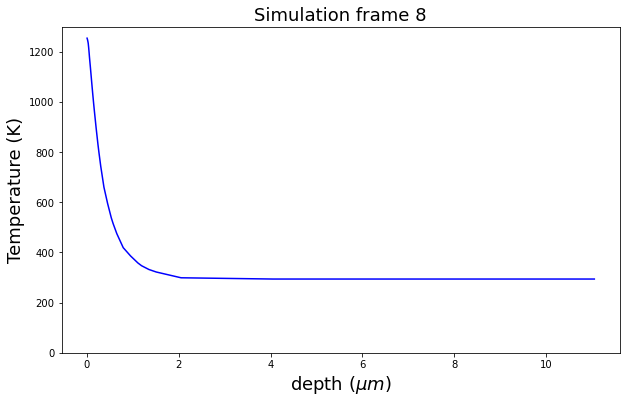

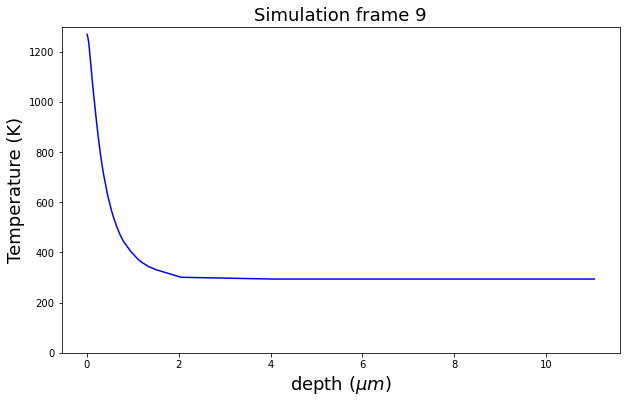

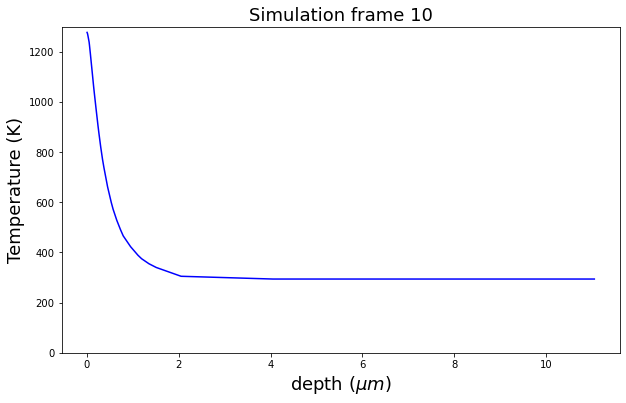

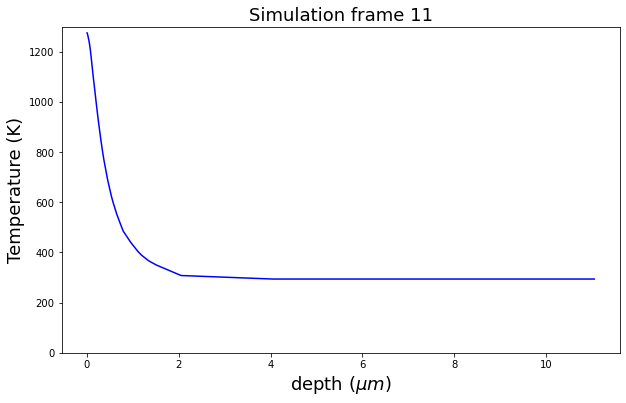

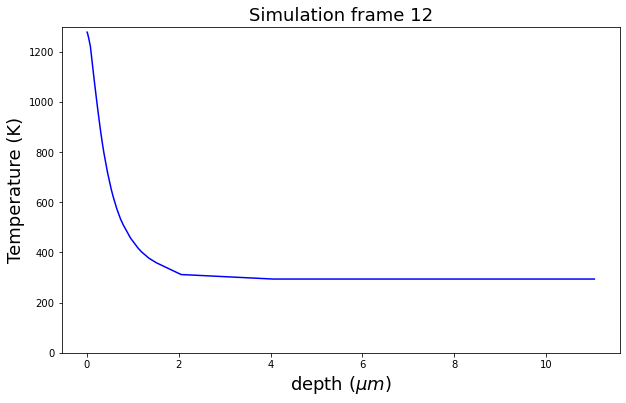

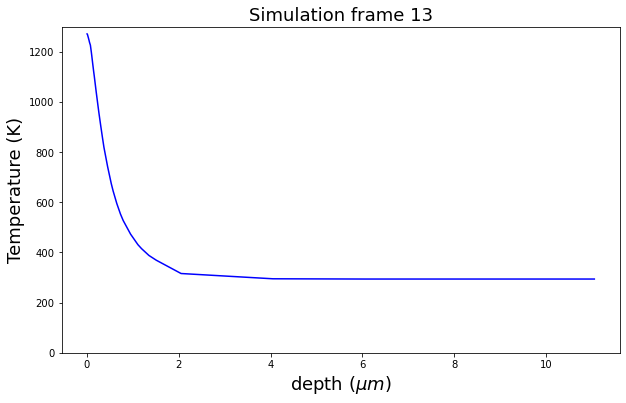

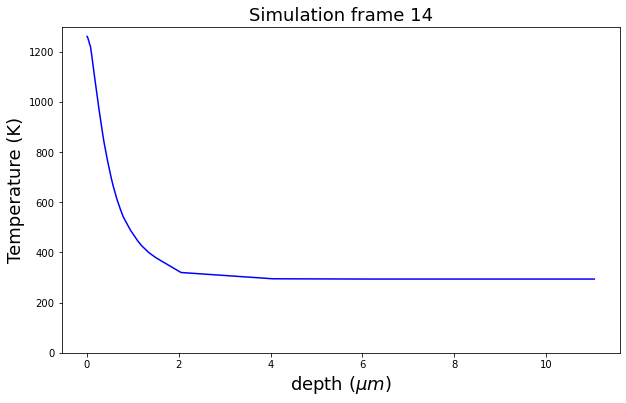

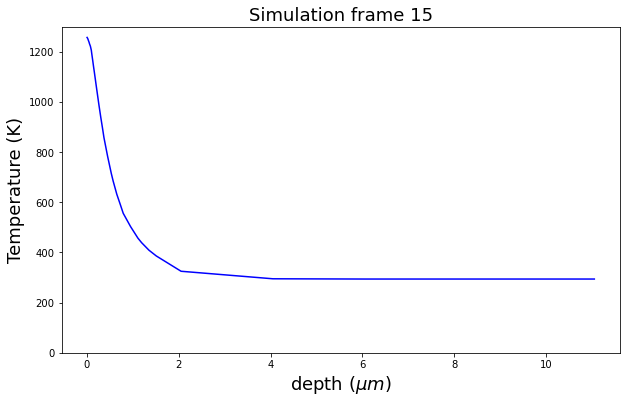

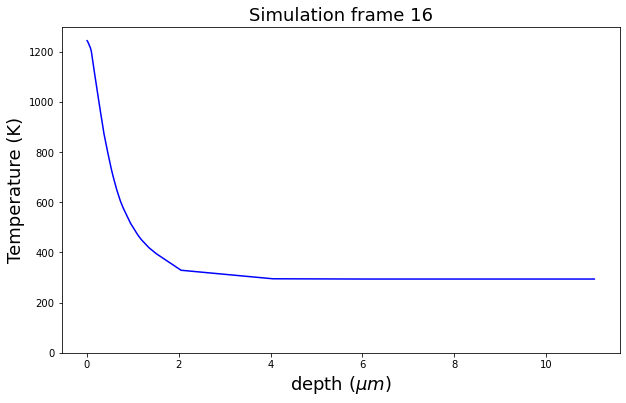

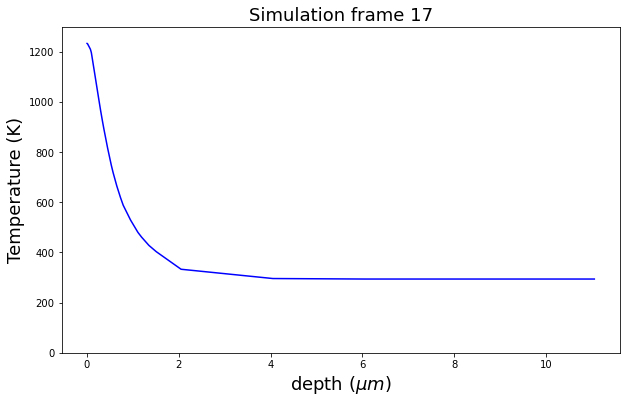

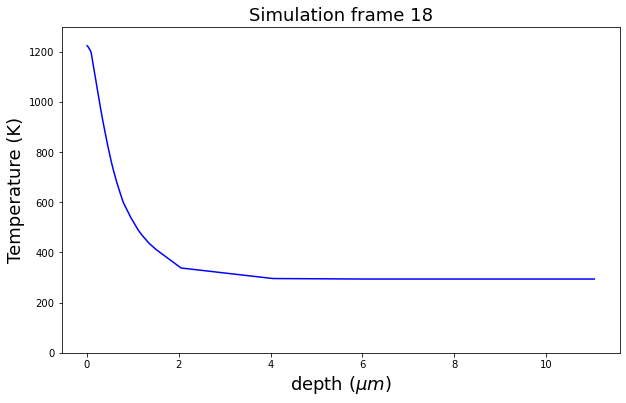

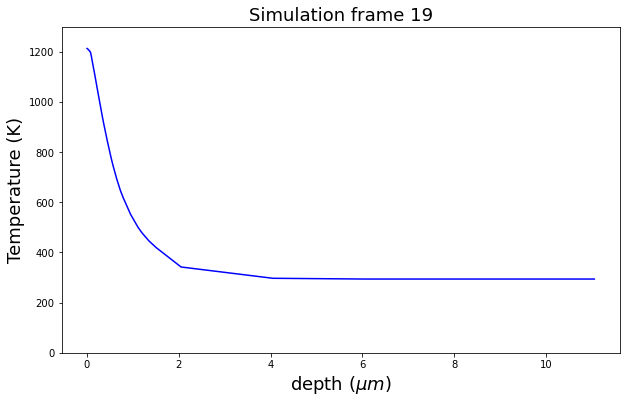

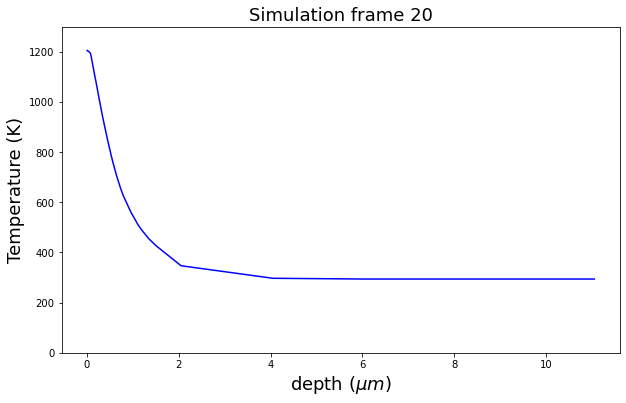

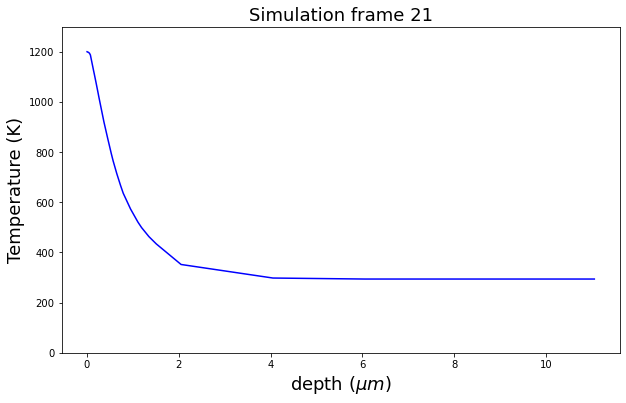

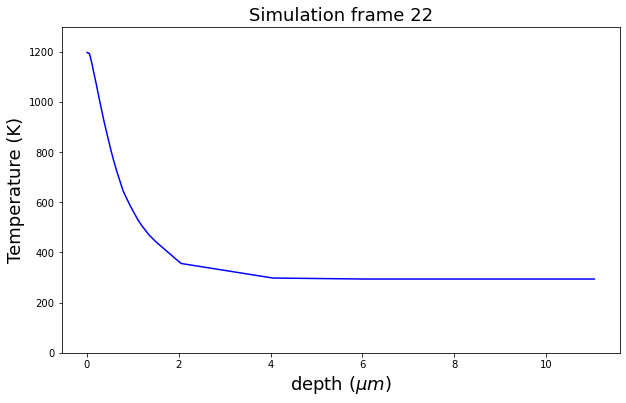

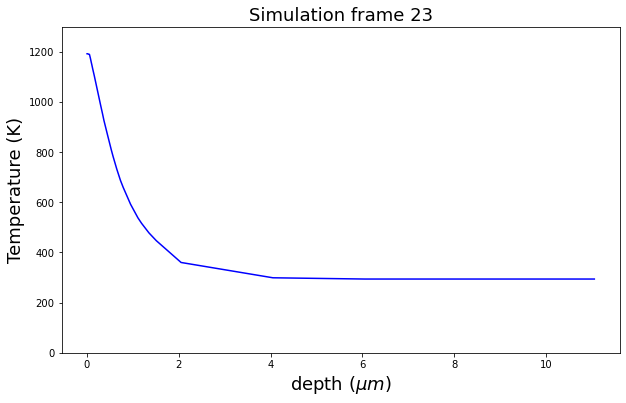

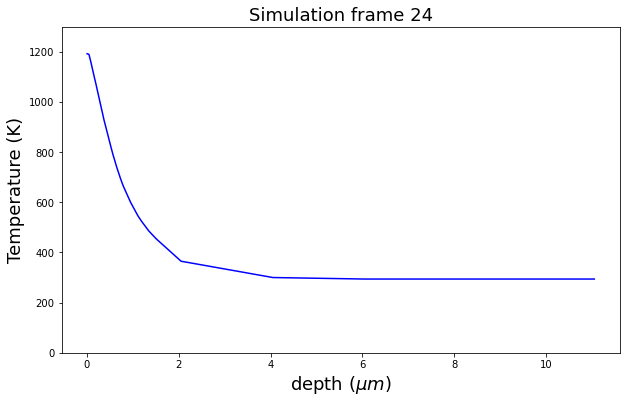

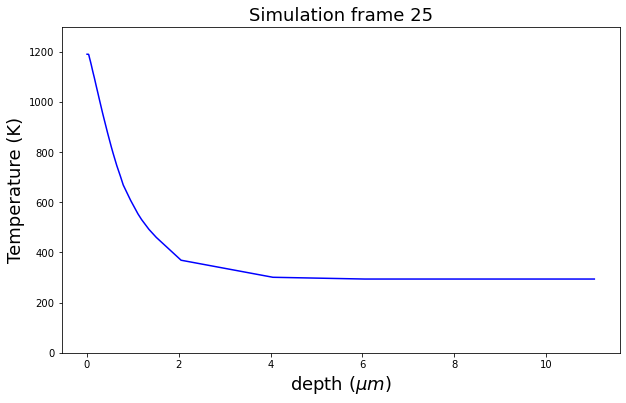

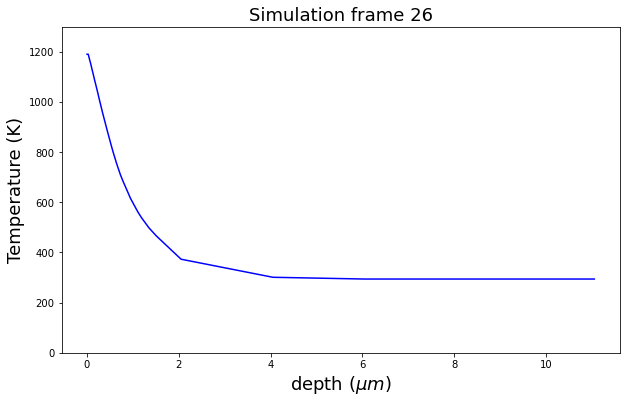

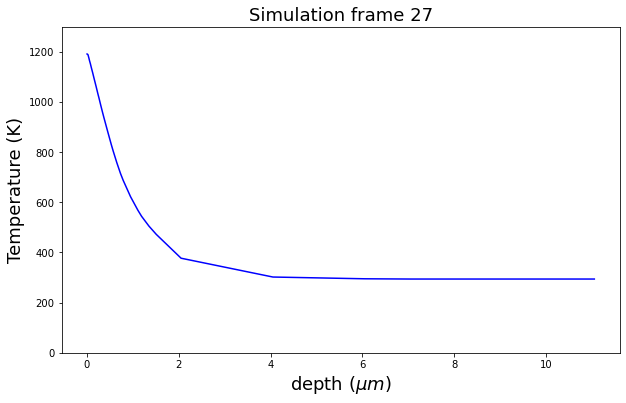

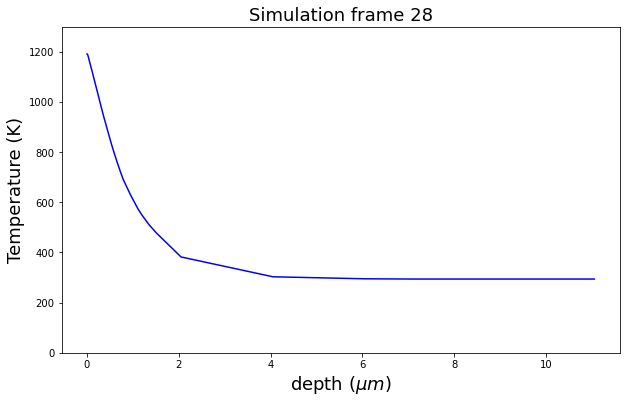

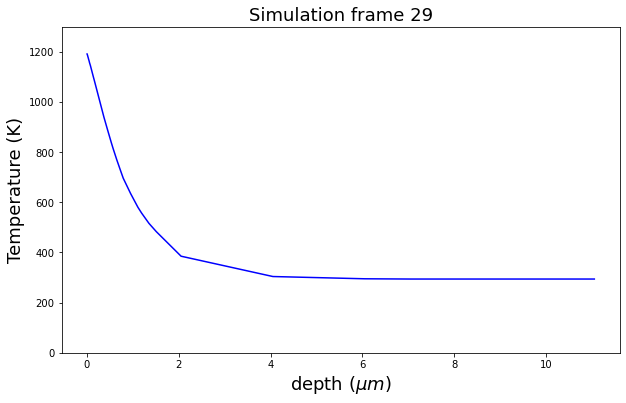

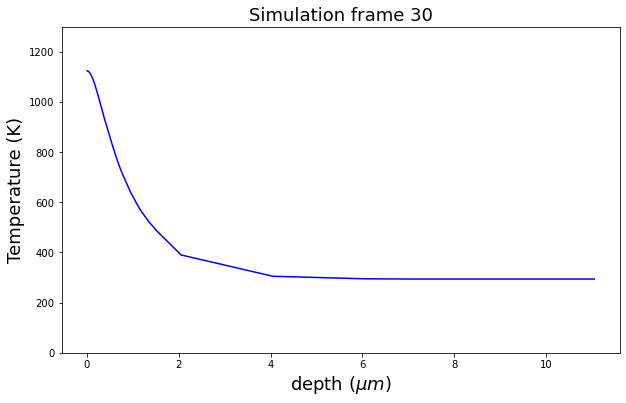

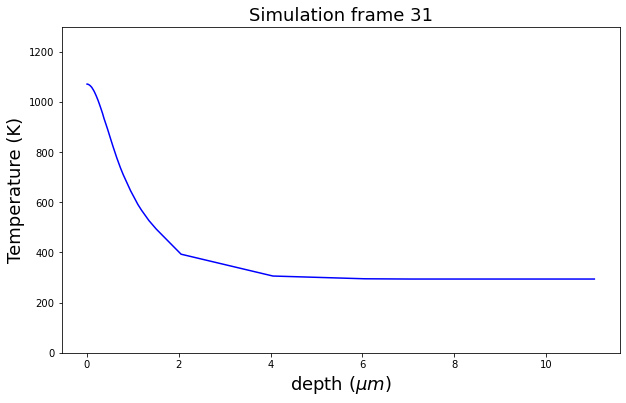

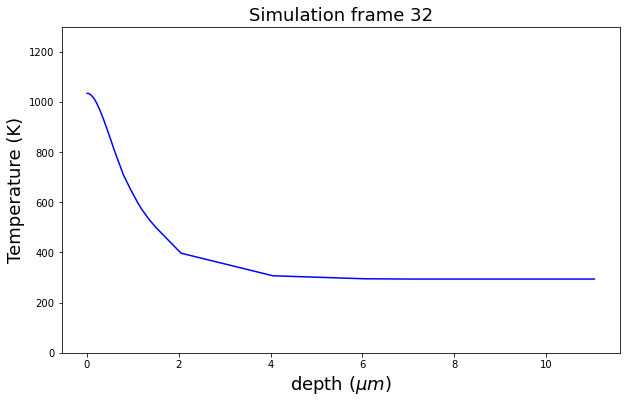

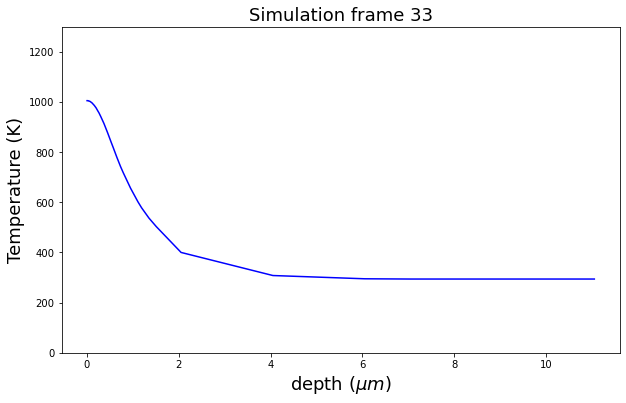

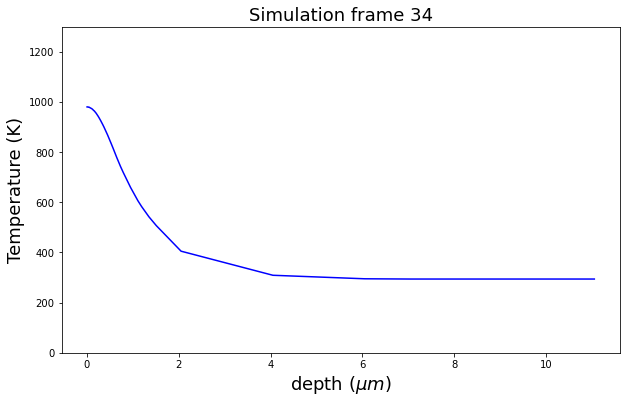

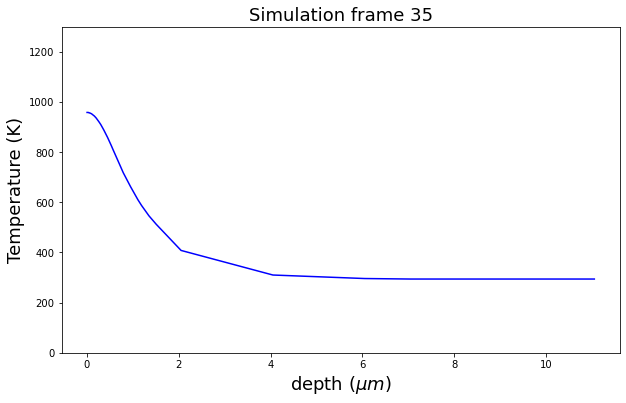

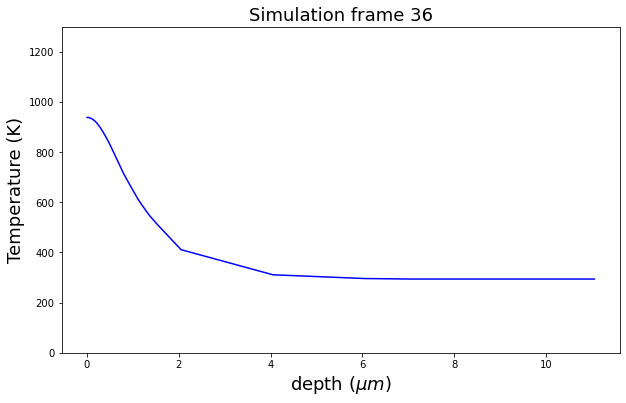

In [3]:
data = np.loadtxt(filename1)
X=data[:,:]
x = data[:,0]*0.0001
for i in range(1,len(X[0,:])):
    y = data[:,i]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, c='b')
    ax.set_ylim(0,maxTempReached)
    ax.set_title('Simulation frame %i' %i, size=18)
    ax.set_xlabel('depth ($\mu m$)', fontsize=18)
    ax.set_ylabel('Temperature (K)', fontsize=18)
    plt.show()

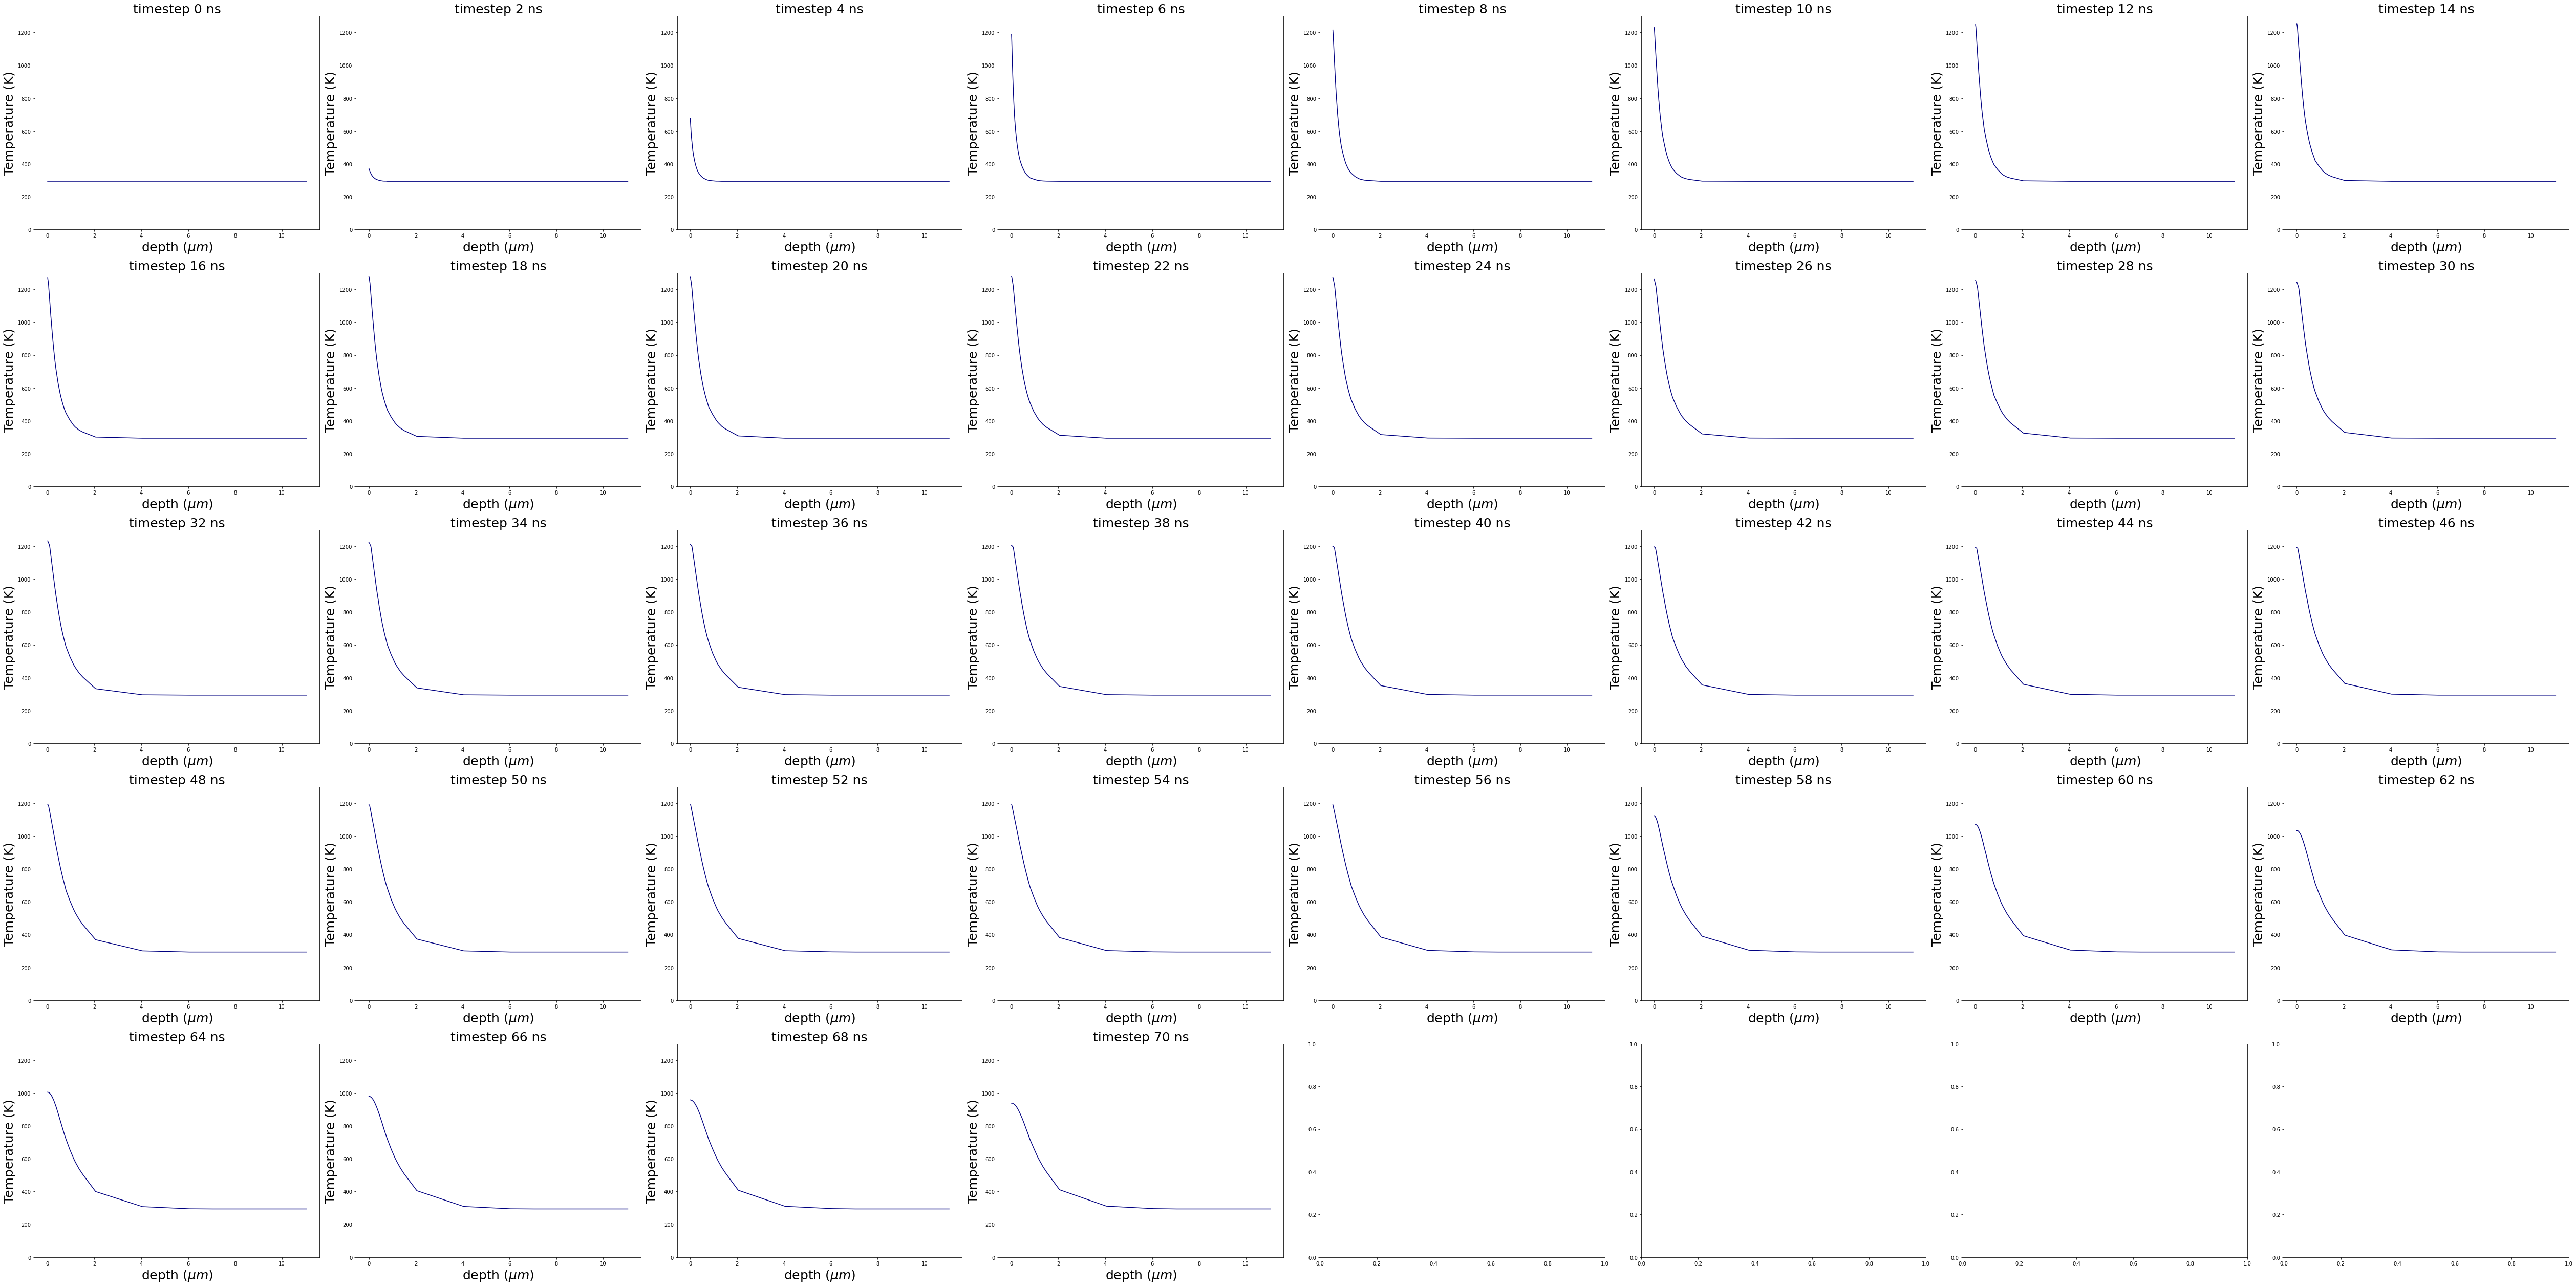

In [4]:
import matplotlib.gridspec as gridspec

data = np.loadtxt(filename1)
x = data[:,0]*0.0001
n_cols=int(len(X[0,:])/5)#with different timestep check how many rows you desire
fig, ax = plt.subplots(5, n_cols+1, figsize=(70,35))#with different timestep check how many rows you desire
ax = ax.ravel()
#fig.suptitle('Temperature (K) vs depth for energy impulse %i $mJ/cm^2$' %energy_impulse,fontsize=70)
for i in range(len(X[0,:])-1):
    y = data[:,i+1]
    t=(i)*timestep
    ax[i].plot(x, y,  c='navy')
    ax[i].set_ylim(0,maxTempReached)
    ax[i].set_title('timestep %i ns' %t,fontsize=25)
    ax[i].set_xlabel('depth ($\mu m$)', fontsize=25)
    ax[i].set_ylabel('Temperature (K)', fontsize=25)
fig.tight_layout()
plt.savefig('plot_Tvsdepth_%i_mJ' %energy_impulse)

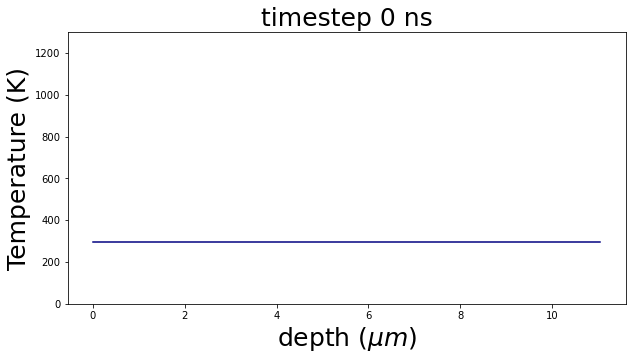

In [5]:
data = np.loadtxt(filename1)
x = data[:,0]*0.0001
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
def AnimationTvsDepth(i):
    plt.clf()
    y = data[:,i+1]
    t=(i)*timestep
    plt.plot(x, y,  c='navy')
    plt.ylim(0,maxTempReached)
    plt.title('timestep %i ns' %t,fontsize=25)
    plt.xlabel('depth ($\mu m$)', fontsize=25)
    plt.ylabel('Temperature (K)', fontsize=25)
f=len(X[0,:])-1  
animator = ani.FuncAnimation(fig, AnimationTvsDepth, f, interval = 200)
   
animator.save(r'AnimationTvsDepth_%i_mJ.mp4' %energy_impulse)


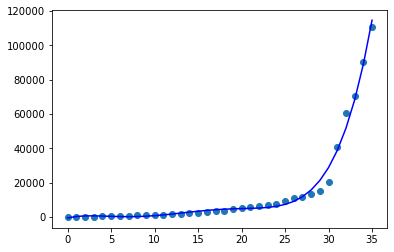

In [78]:
y = data[:,0]
x = np.arange(len(y))
m = np.polyfit(x, y, 5)
plt.scatter(x, y)
plt.plot(x, m[0]*x**5 + m[1]*x**4+m[2]*x**3+m[3]*x**2+m[4]*x+m[5], 'blue')
def fitting(x):
    return (m[0]*x**5 + m[1]*x**4+m[2]*x**3+m[3]*x**2+m[4]*x+m[5])
plt.show()

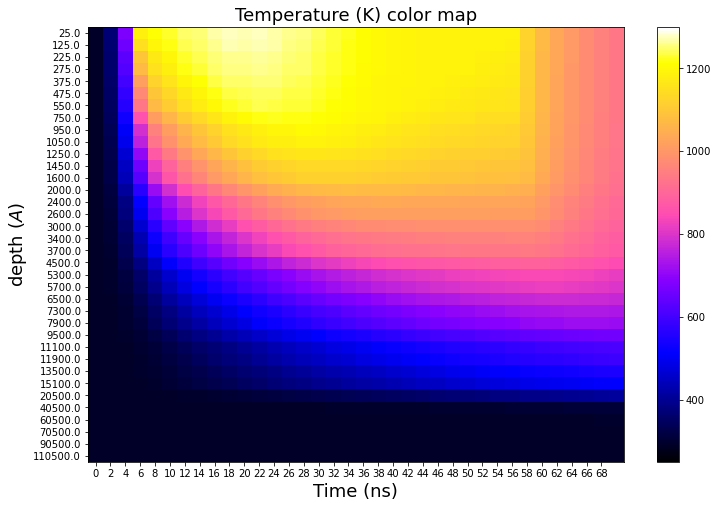

In [6]:
data = np.loadtxt(filename1)
x = data[:,0]
X=data[:,1:]
T=[]
for i in range(1,len(X[0,:])):
    t=(i-1)*timestep
    T.append(t)
fig, ax = plt.subplots(figsize=(12,8))
imagetoplot=ax.imshow(X, cmap='gnuplot2', vmin=250, vmax=maxTempReached,  aspect='auto')
fig.colorbar(imagetoplot, orientation='vertical')
ax.set_title('Temperature (K) color map',fontsize=18)
ax.set_yticks(np.arange(len(x)))
ax.set_yticklabels(x)
ax.set_xticks(np.arange(len(T)))
ax.set_xticklabels(T)
ax.set_xlabel('Time (ns)',fontsize=18)
ax.set_ylabel('depth ($A$)',fontsize=18)
fig.savefig('plot_%i_mJ' %energy_impulse)

In [29]:
with open(filename2, mode='r+') as f:
    d = f.readlines()
    f.seek(0)
    for i in d:
        if i[0] != 'C':
            f.write(i)
    f.truncate()

In [7]:
data1 = np.loadtxt(filename2)
x1= data1[:,0]
y1 = data1[:,1]
maxA=max(y1)*0.0001
L=[]
for i in range(len(x1)):
    L.append([x1[i],y1[i]])
dim=len(x1)
for i in range(len(L)-2):
    if L[i][0]% timestep != 0:
        L.pop(i)
tdepth=np.array(L)

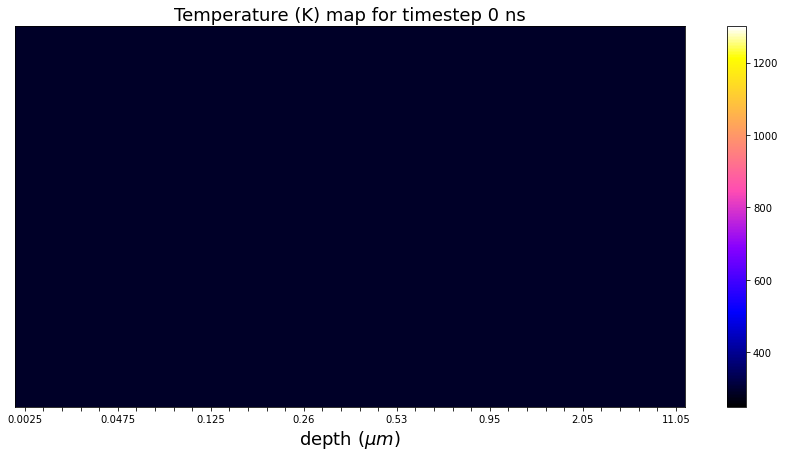

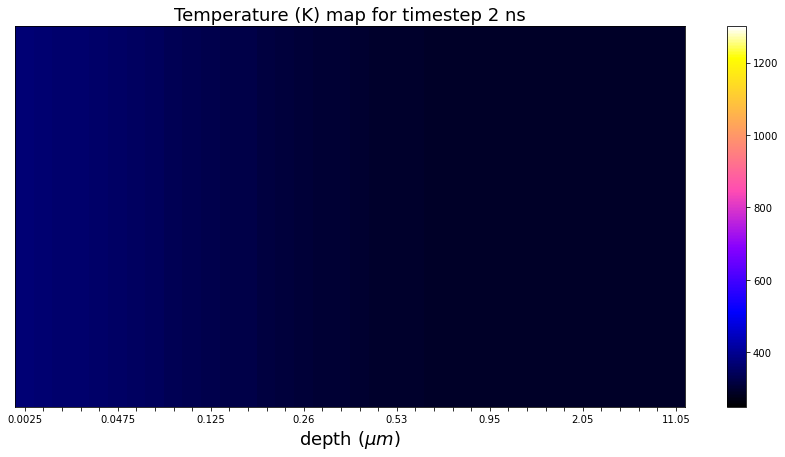

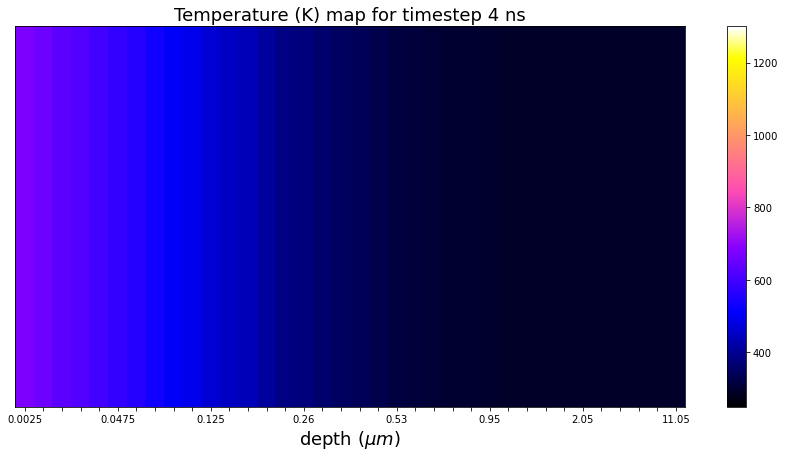

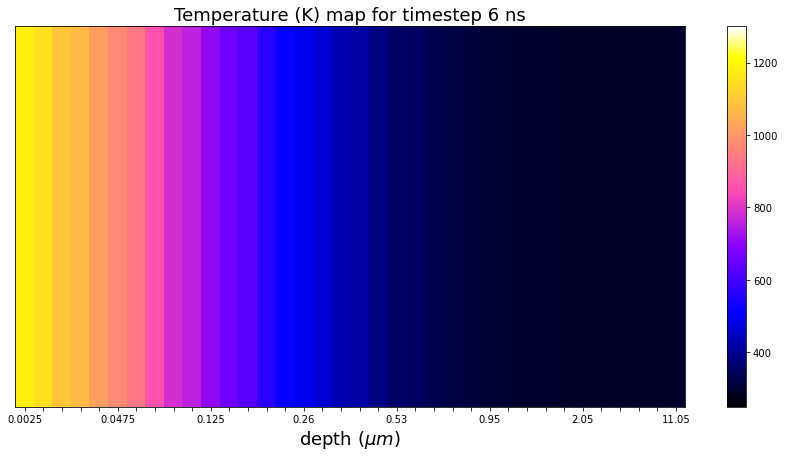

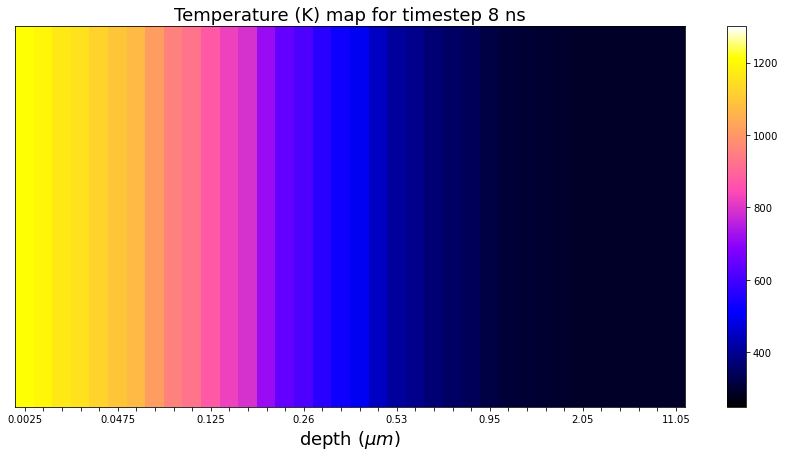

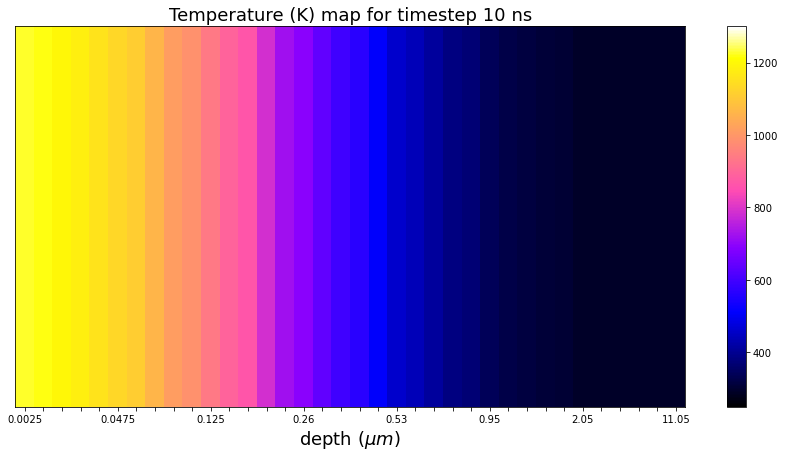

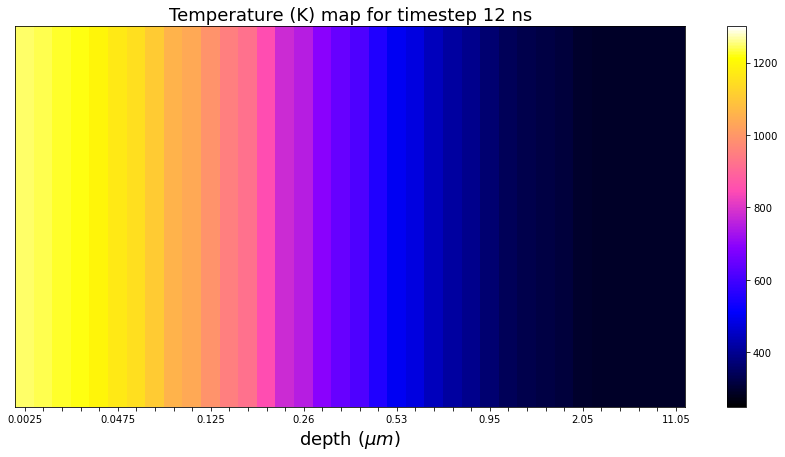

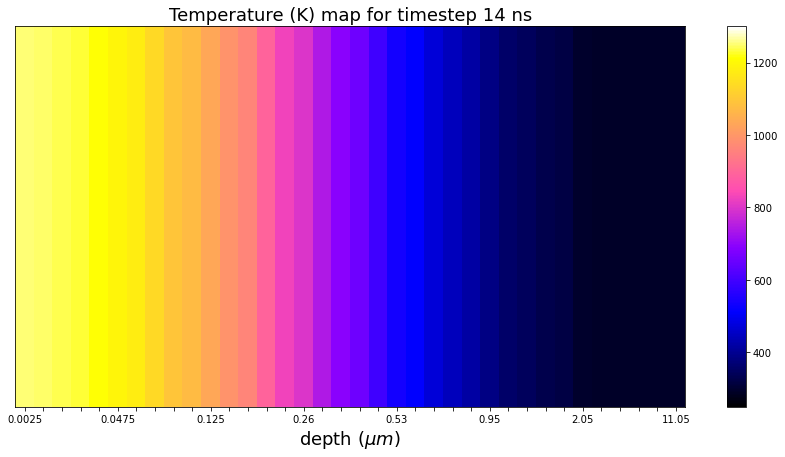

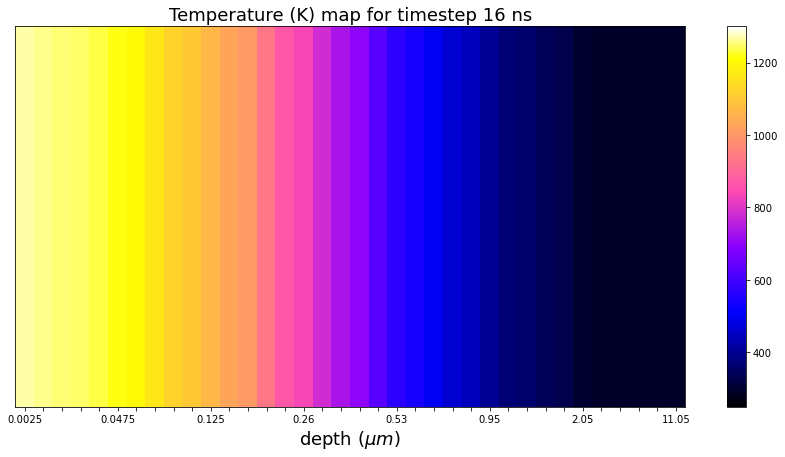

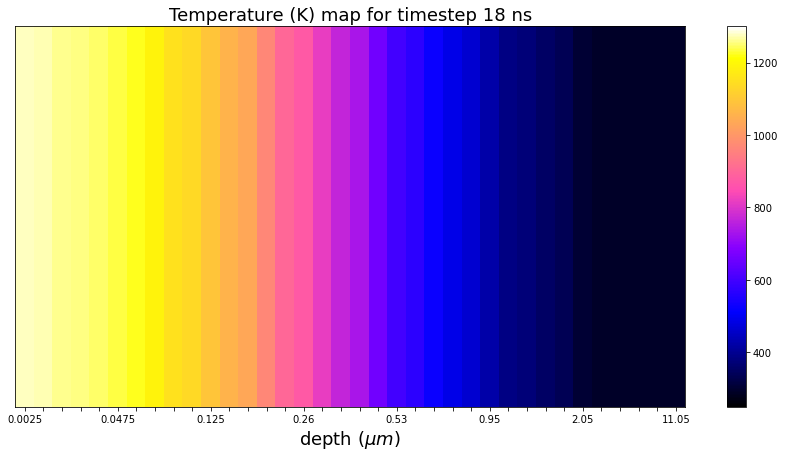

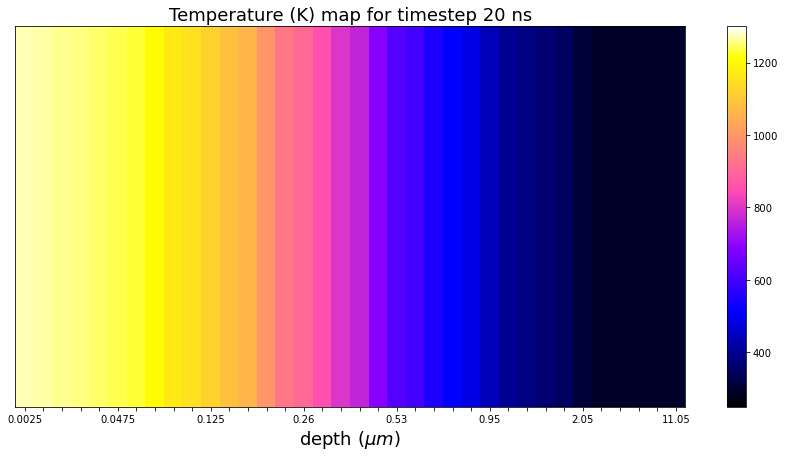

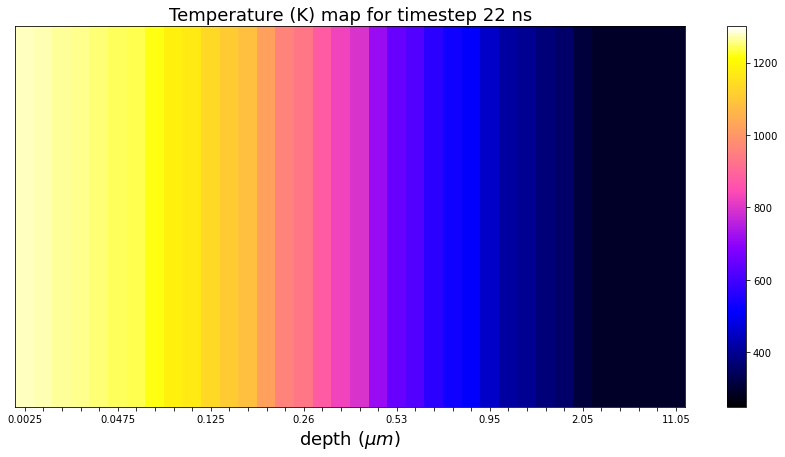

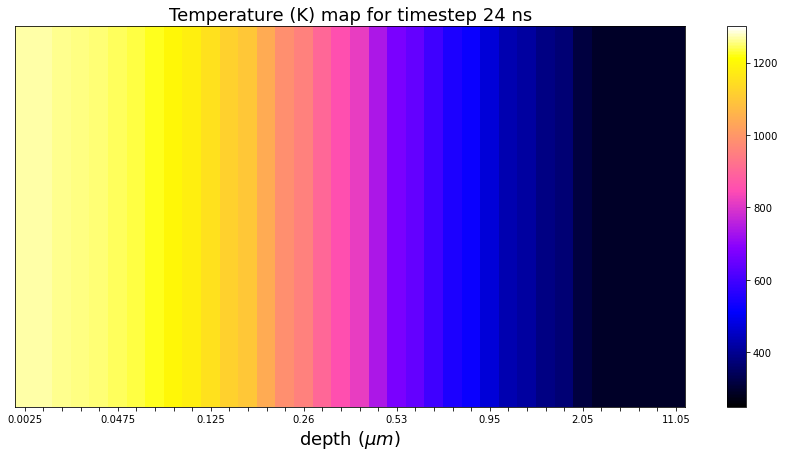

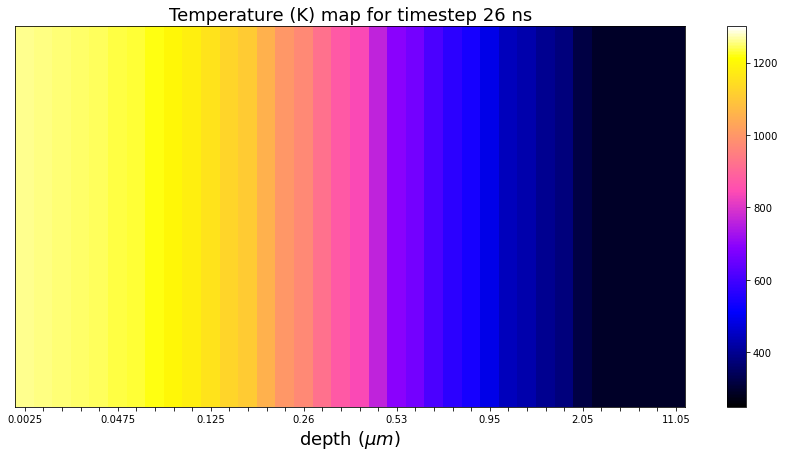

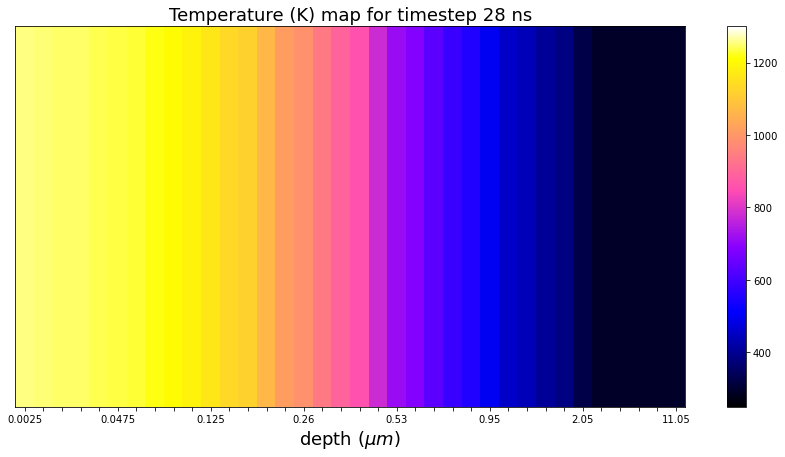

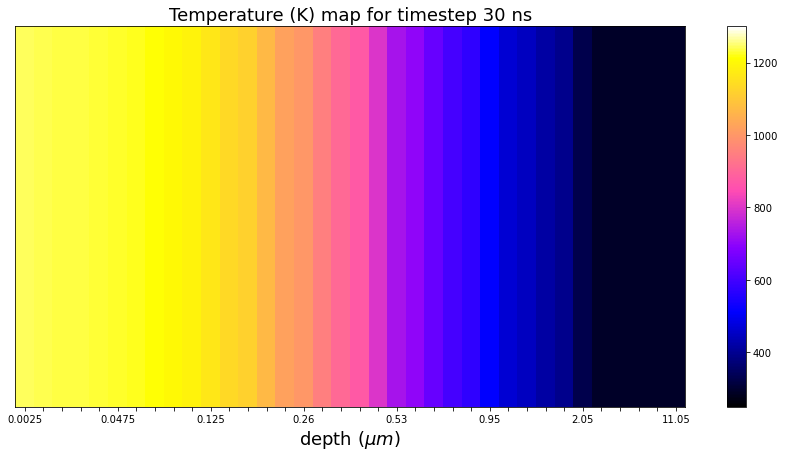

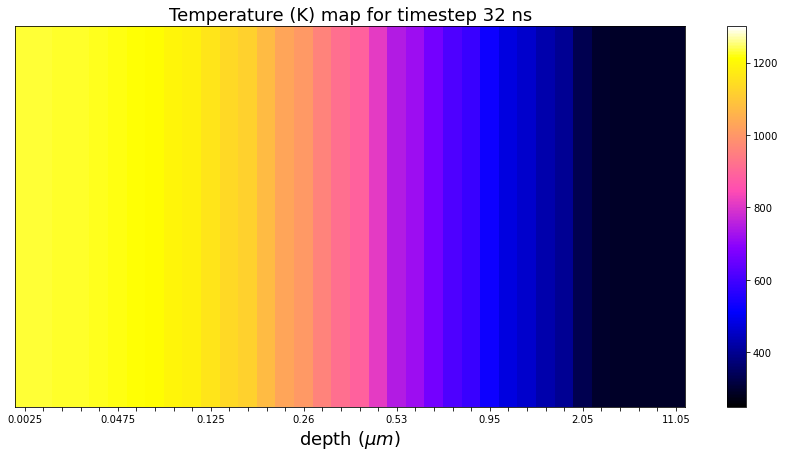

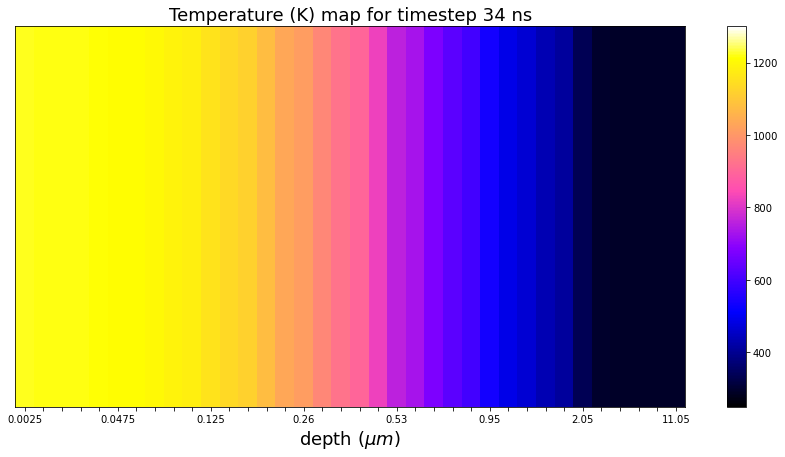

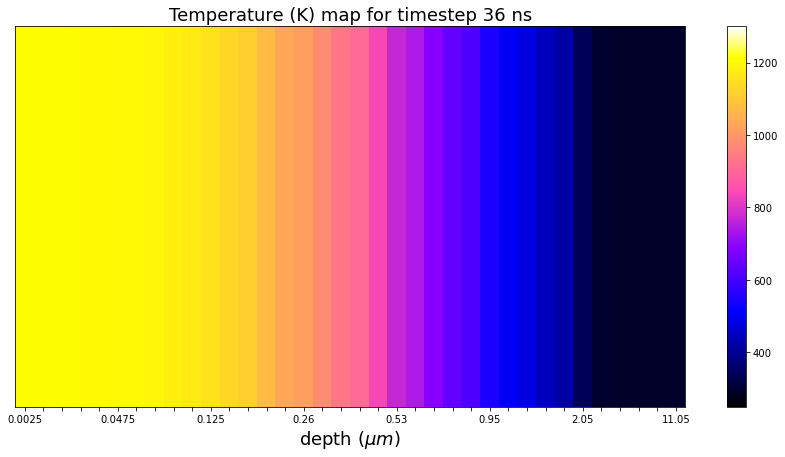

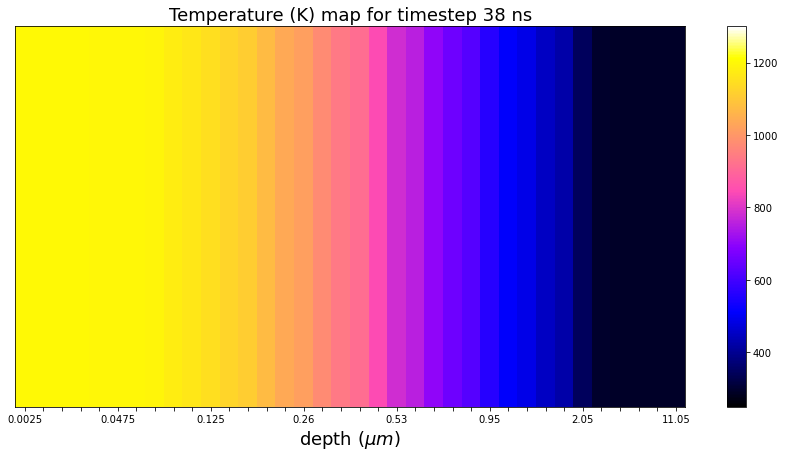

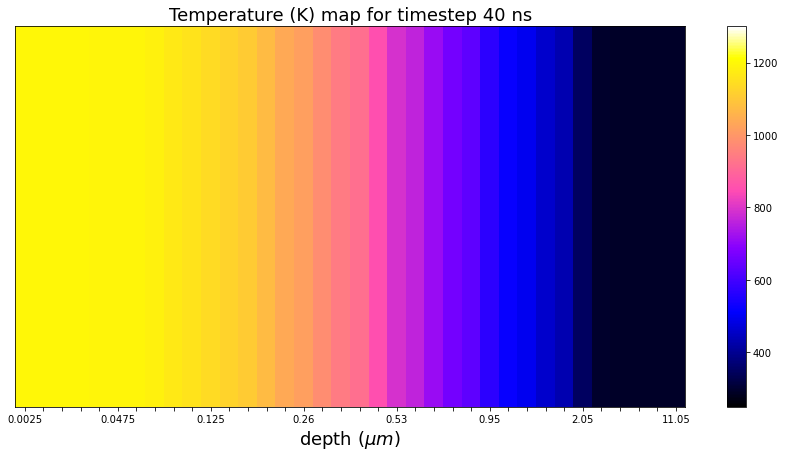

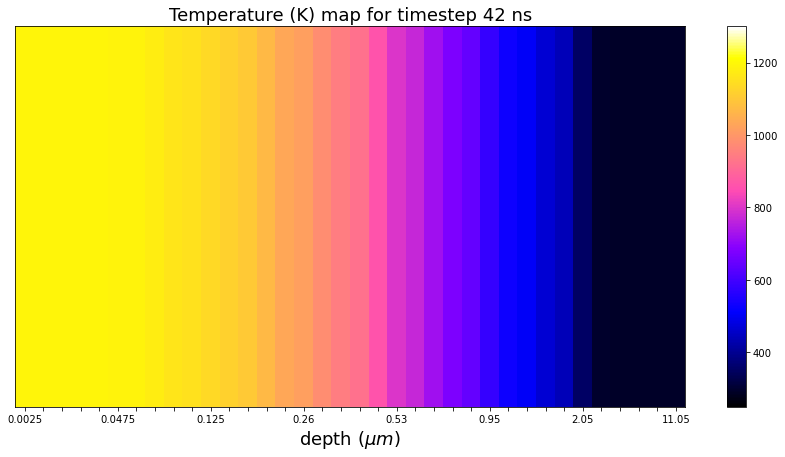

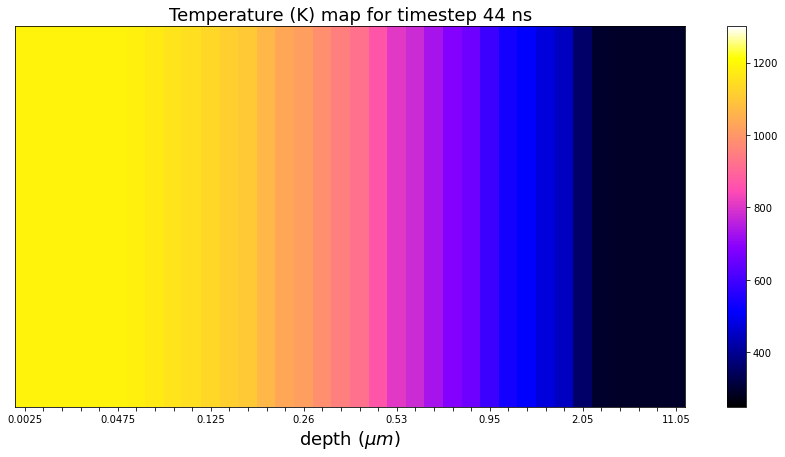

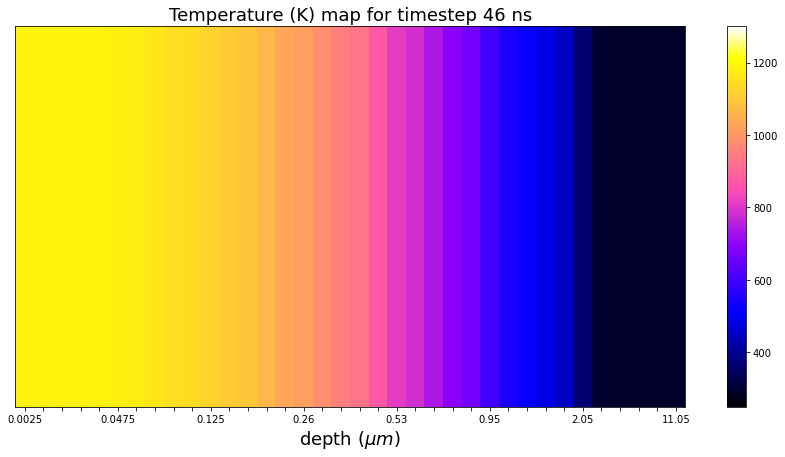

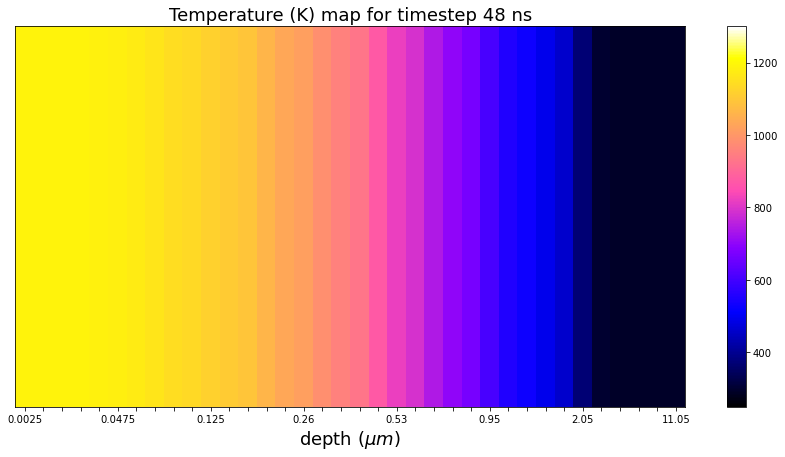

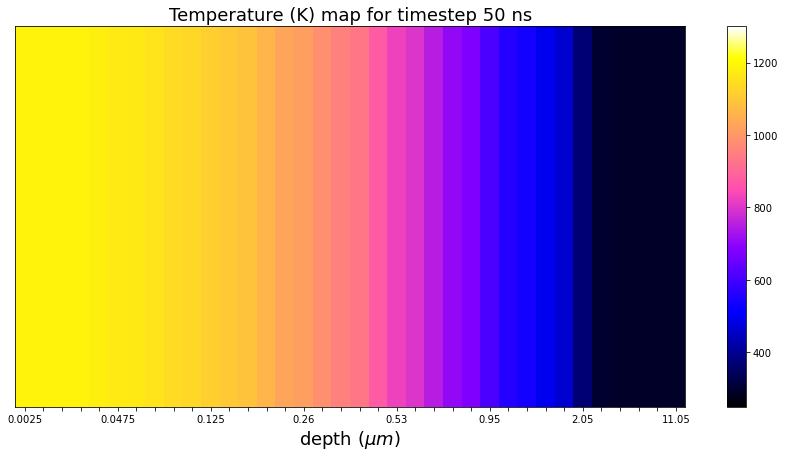

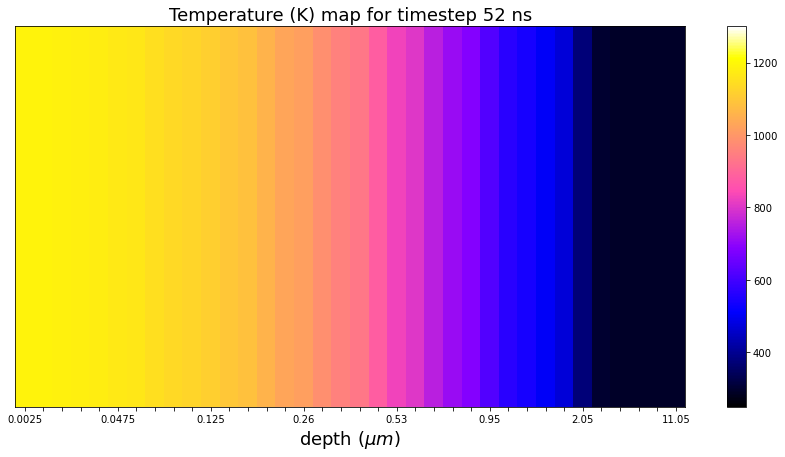

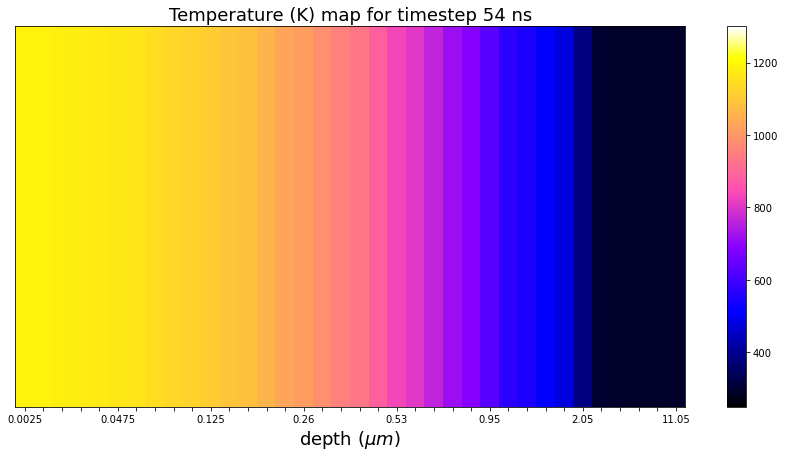

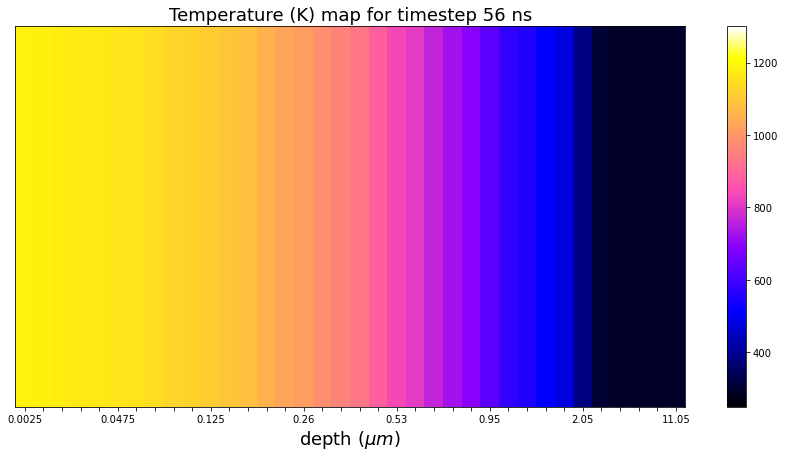

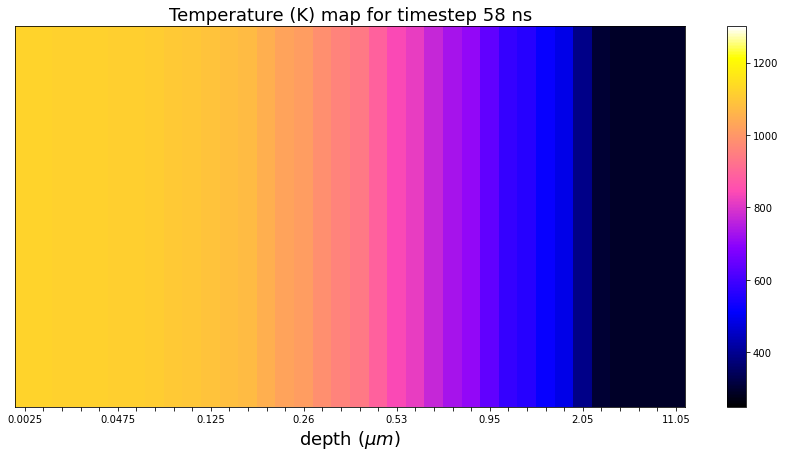

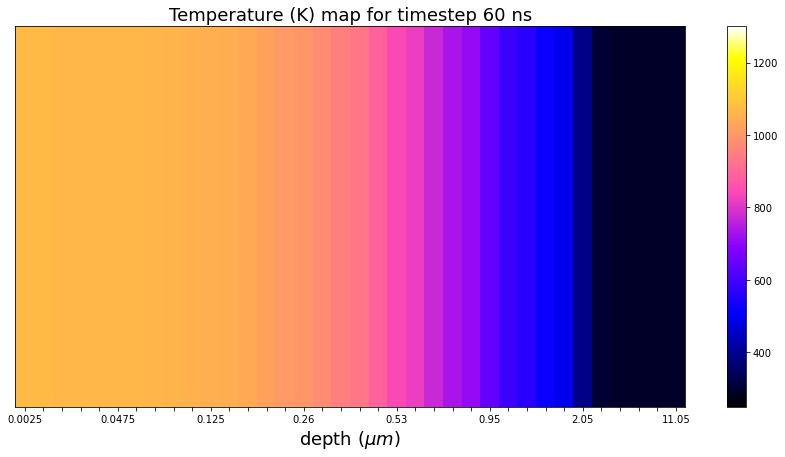

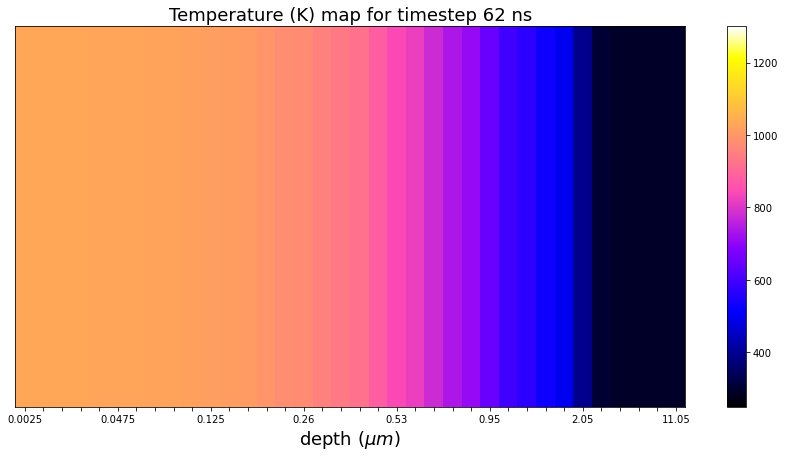

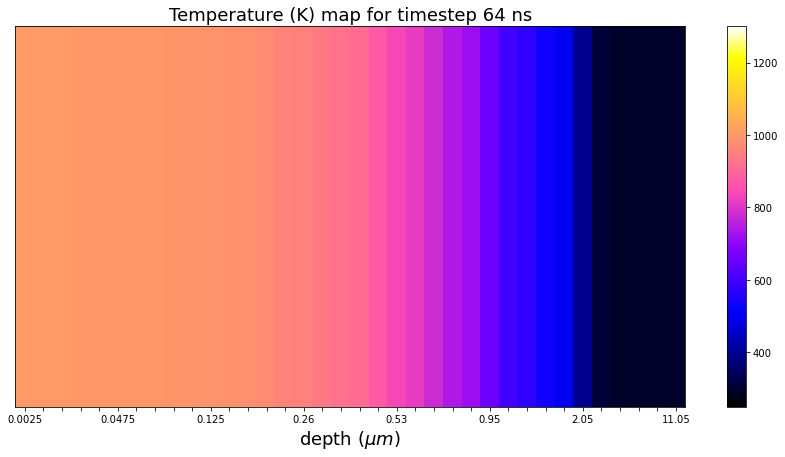

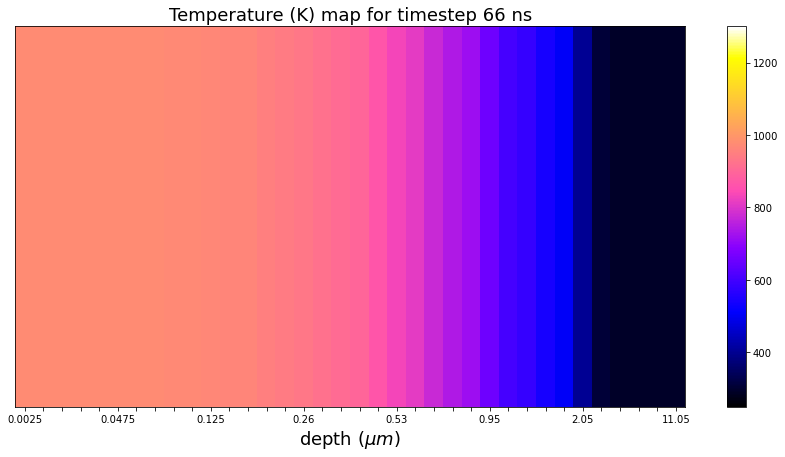

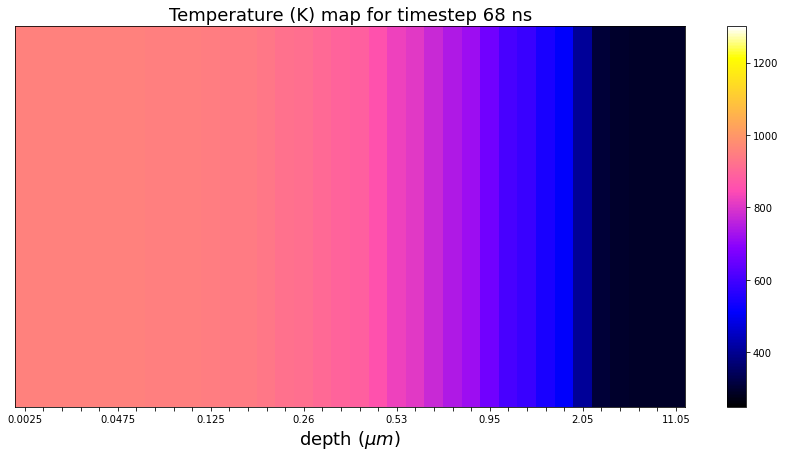

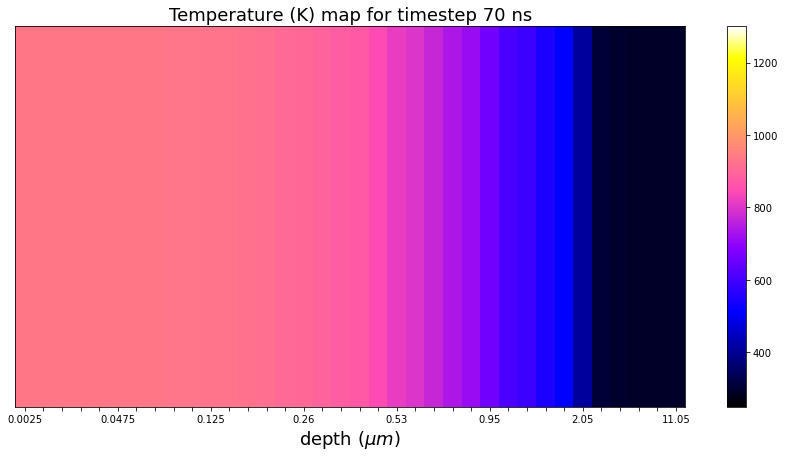

In [8]:
x_n = data[:,0]
#mircometers
x = [25*0.0001,' ',' ',' ',' ',475*0.0001,' ',' ',' ',' ',1250*0.0001,' ',' ',' ',' ',2600*0.0001,' ',' ',' ',' ',5300*0.0001,' ',' ',' ',' ',round(9500*0.0001,2),' ',' ',' ',' ',round(20500*0.0001,2),' ',' ',' ',' ',110500*0.0001] 
X = data[:,:]
times=[]
for i in range(1,len(X[0,:])):
    fig = plt.figure( figsize=(15, 7))
    t=(i-1)*timestep
    times.append(t)
    y = data[:,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y, cmap='gnuplot2', vmin=250, vmax=maxTempReached, aspect='auto')
    plt.title('Temperature (K) map for timestep %i ns' %t,fontsize=18)
    plt.xticks(np.arange(len(x_n)),x)
    #plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.colorbar(imagetoplot, orientation='vertical')
    plt.xlabel('depth ($\mu m$)',fontsize=18)
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.show()

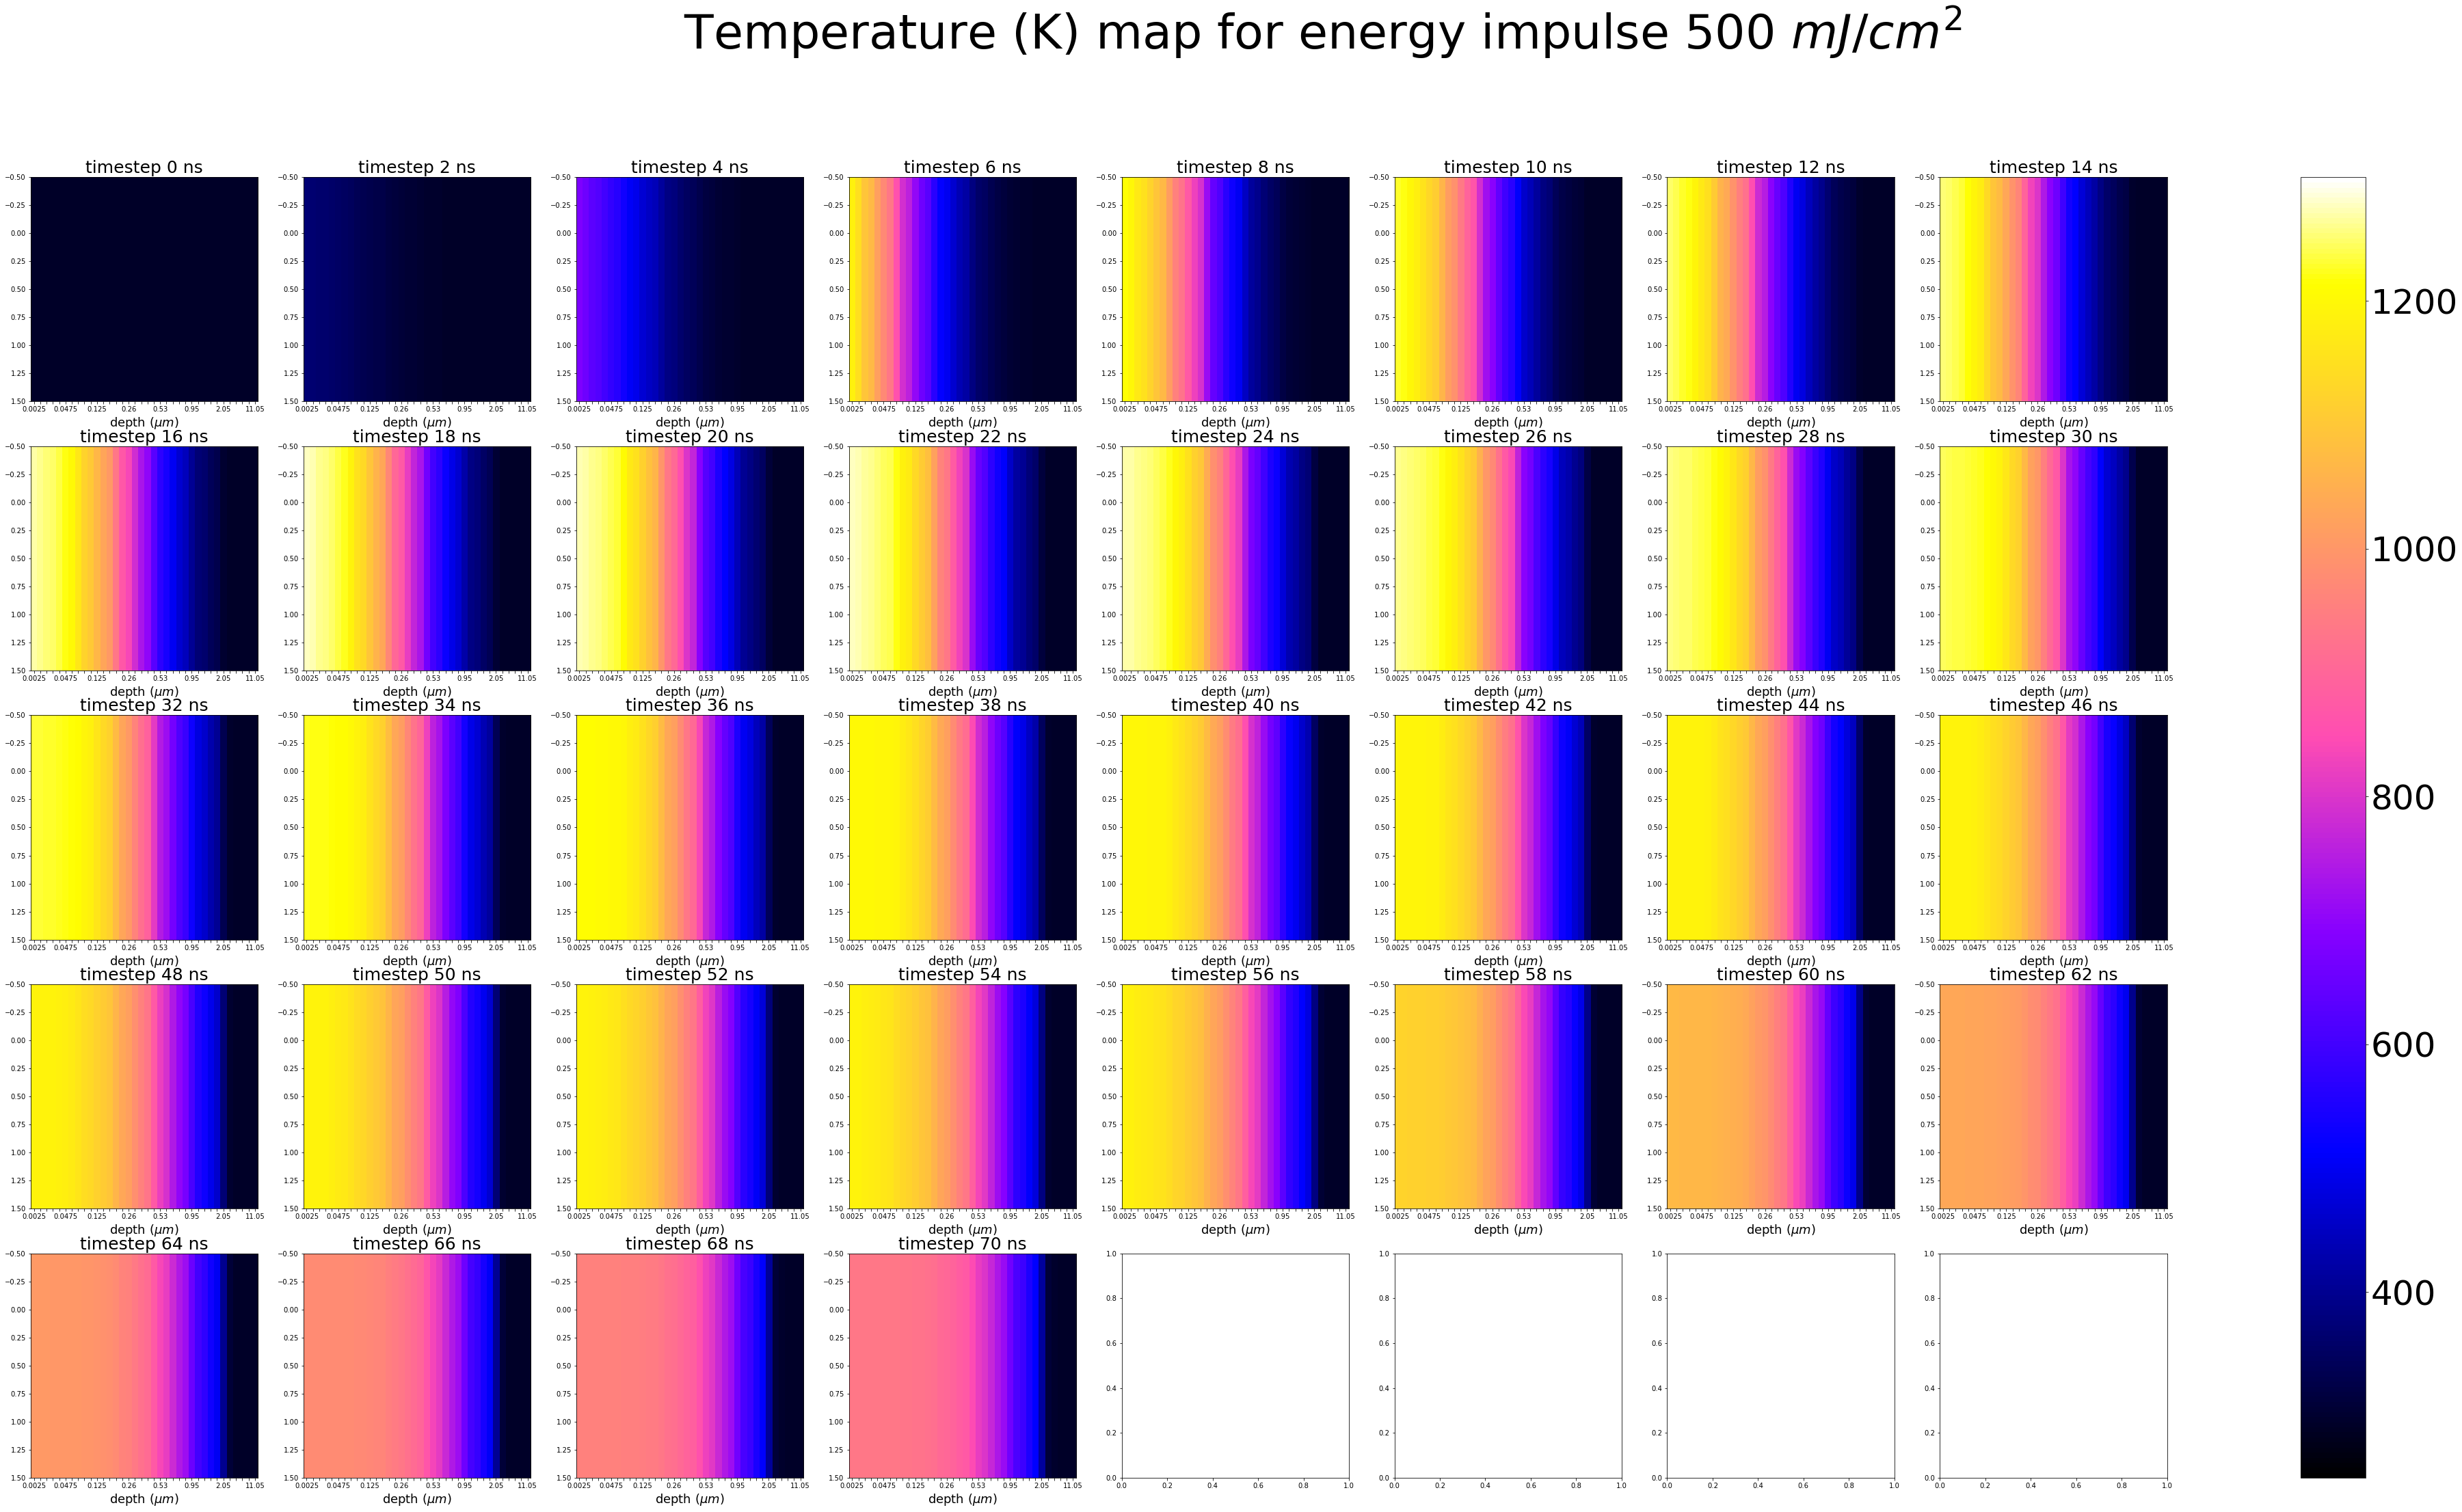

In [9]:
#micrometers
x = [25*0.0001,' ',' ',' ',' ',475*0.0001,' ',' ',' ',' ',1250*0.0001,' ',' ',' ',' ',2600*0.0001,' ',' ',' ',' ',5300*0.0001,' ',' ',' ',' ',round(9500*0.0001,2),' ',' ',' ',' ',round(20500*0.0001,2),' ',' ',' ',' ',110500*0.0001] 
X=data[:,:]
times=[]
n_cols=int(len(X[0,:])/5)#with different timestep check how many rows you desire
fig, ax = plt.subplots(5, n_cols+1, figsize=(70,35))#with different timestep check how many rows you desire
ax = ax.ravel()
fig.suptitle('Temperature (K) map for energy impulse %i $mJ/cm^2$' %energy_impulse,fontsize=70)
for i in range(0,len(X[0,:])-1):
    t=(i)*timestep
    times.append(t)
    y = data[:,i+1]
    Y=np.vstack((y,y))
    ax[i].set_title('timestep %i ns' %t,fontsize=25)
    imagetoplot=ax[i].imshow(Y, cmap='gnuplot2', vmin=250, vmax=maxTempReached, aspect='auto') 
    ax[i].set_xlabel('depth ($\mu m$)',fontsize=18)
    ax[i].set_xticks(np.arange(len(x)))
    ax[i].set_xticklabels(x)
    
cbar=fig.colorbar(imagetoplot, orientation='vertical',ax=ax)
cbar.ax.tick_params(labelsize=50)
plt.savefig('globalplot_%i_mJ' %energy_impulse)

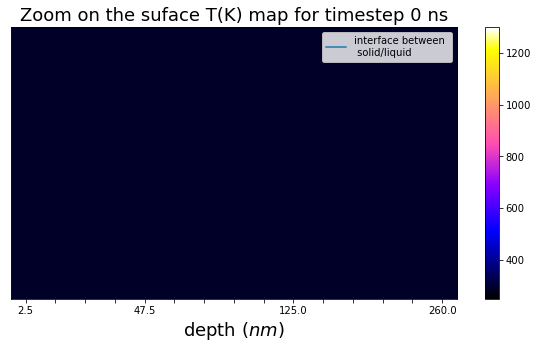

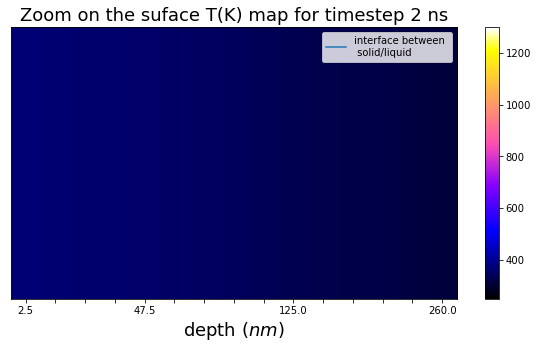

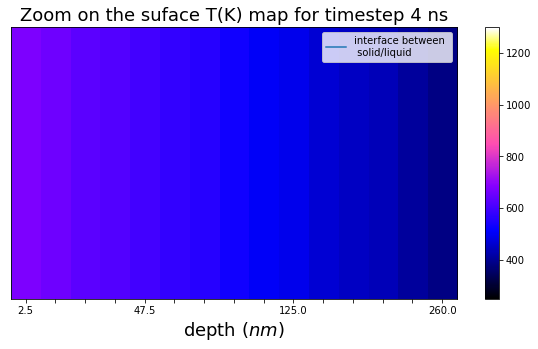

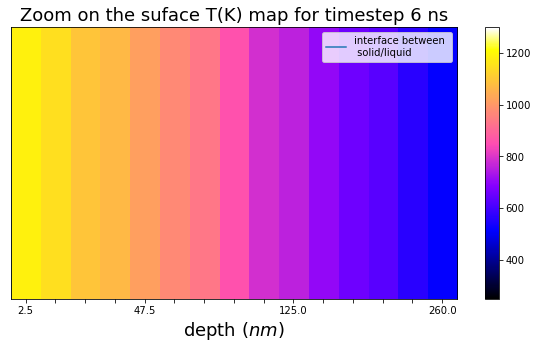

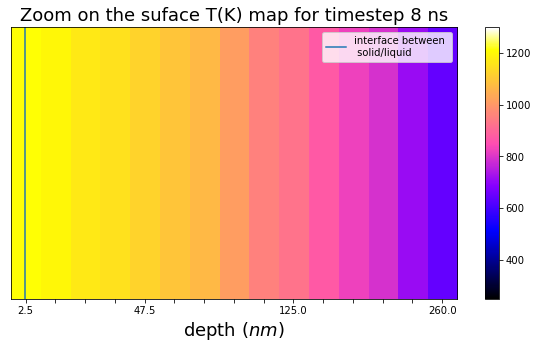

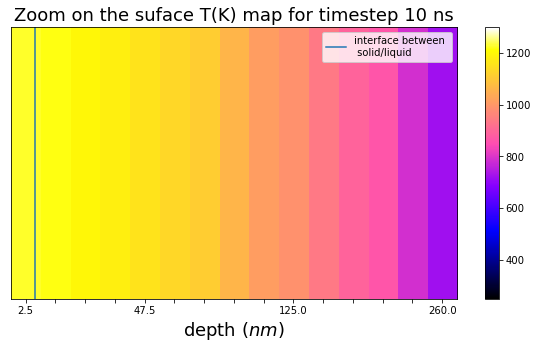

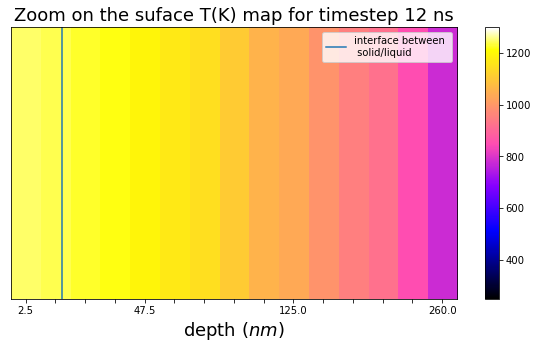

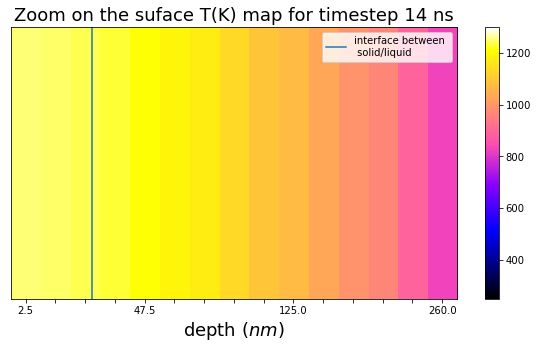

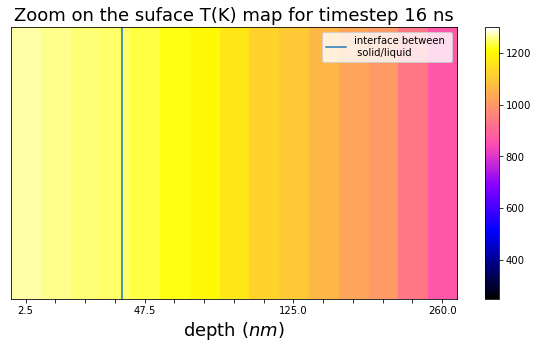

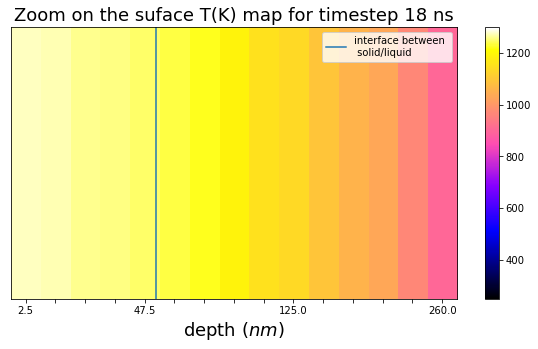

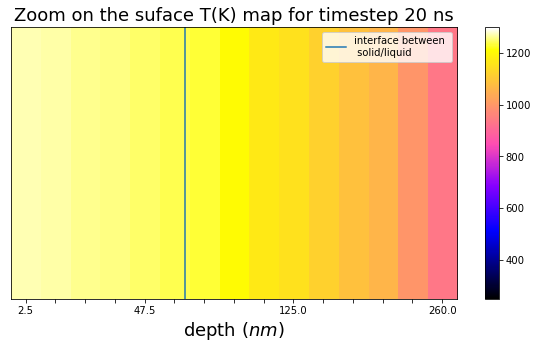

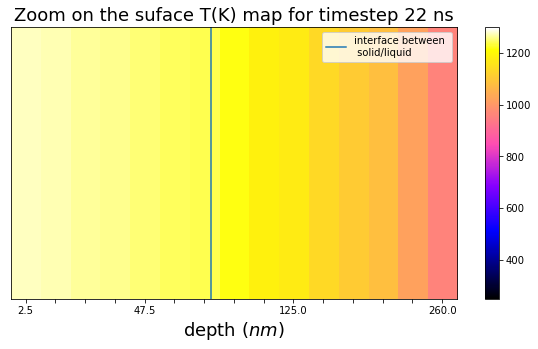

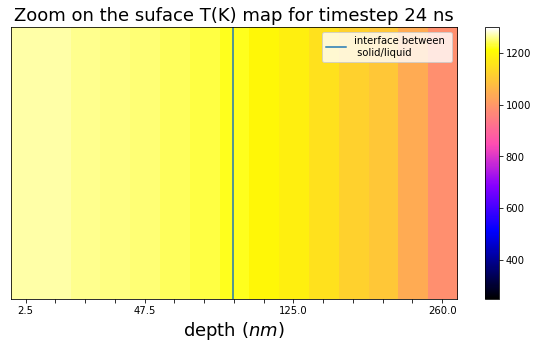

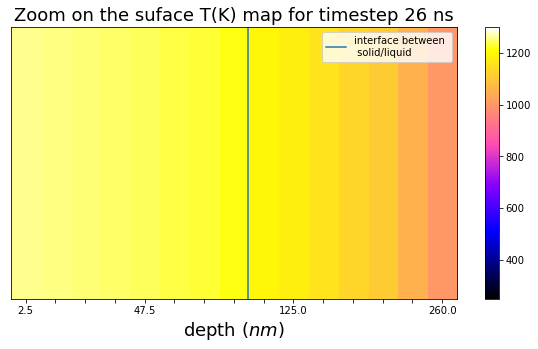

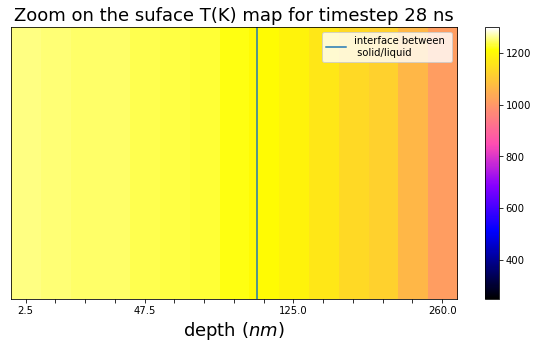

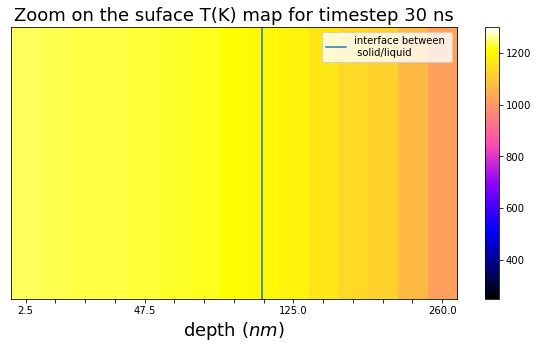

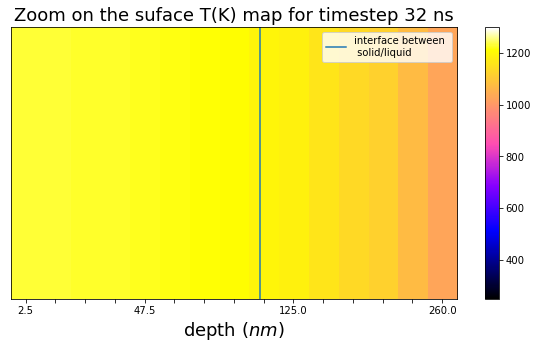

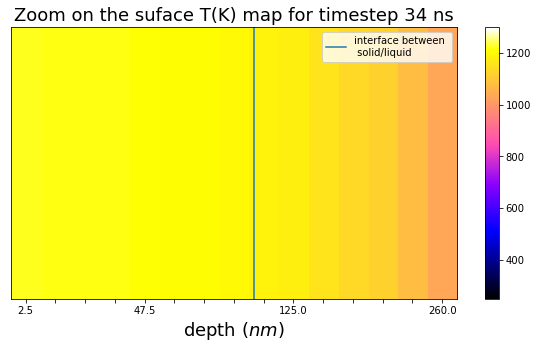

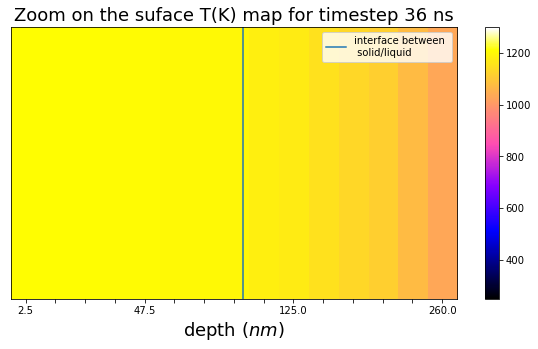

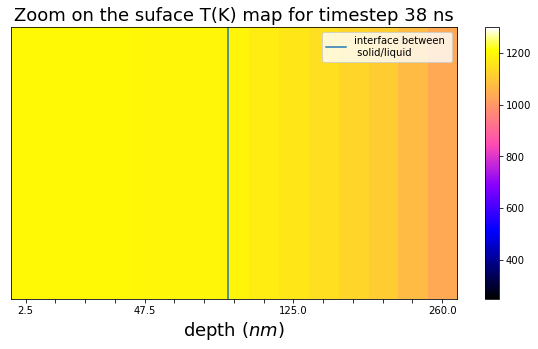

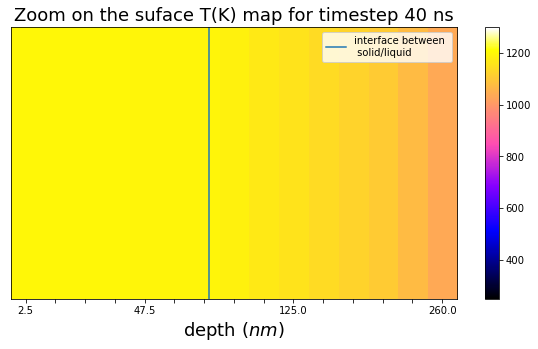

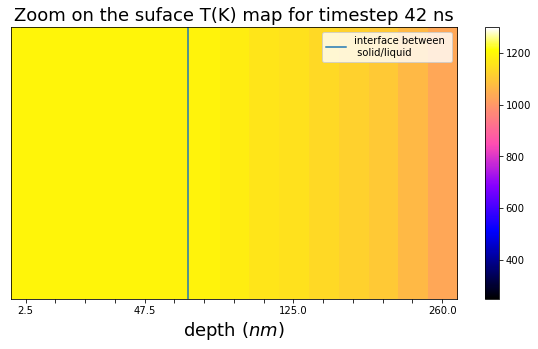

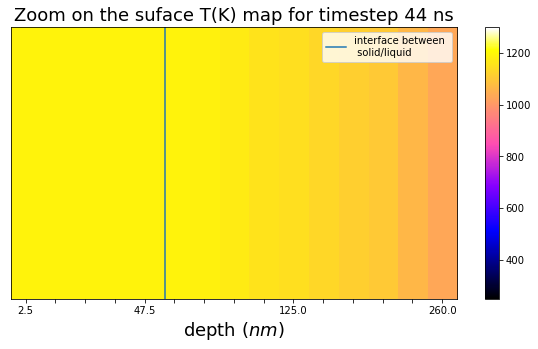

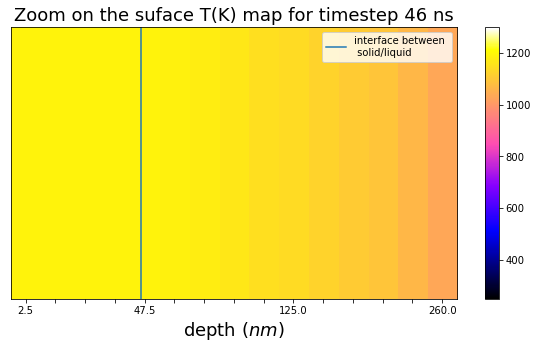

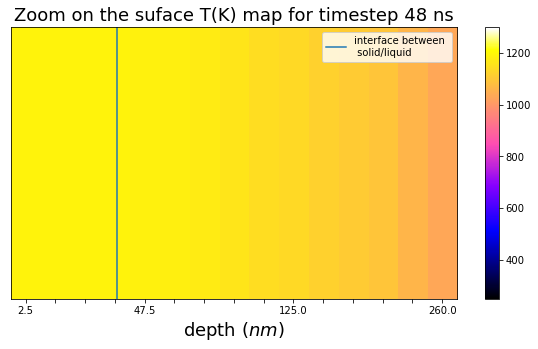

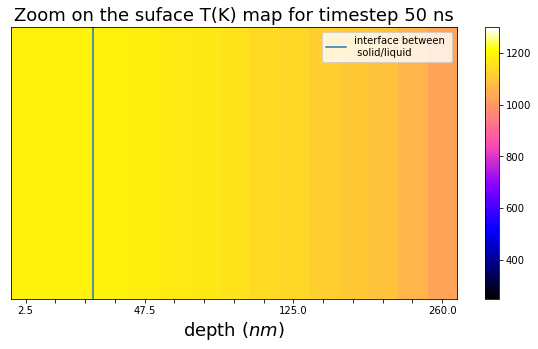

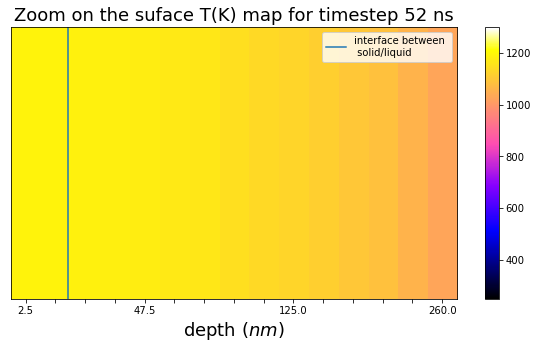

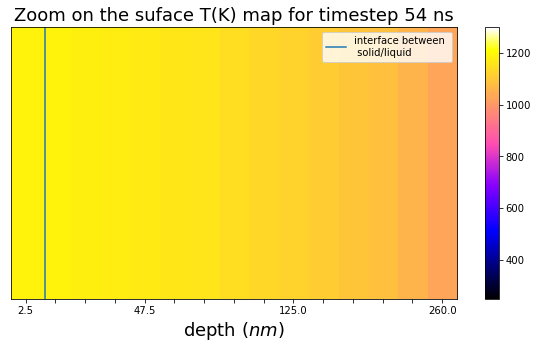

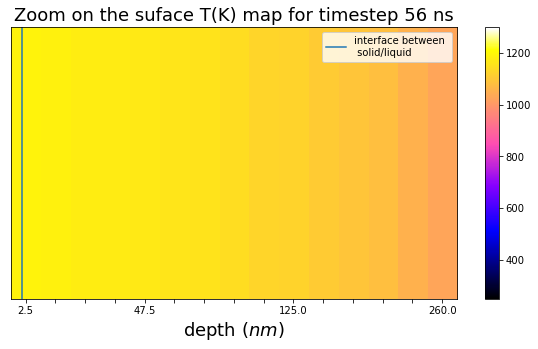

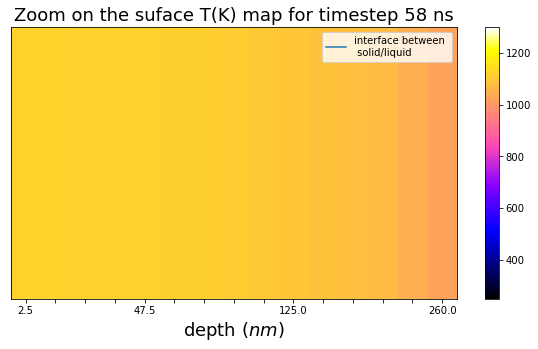

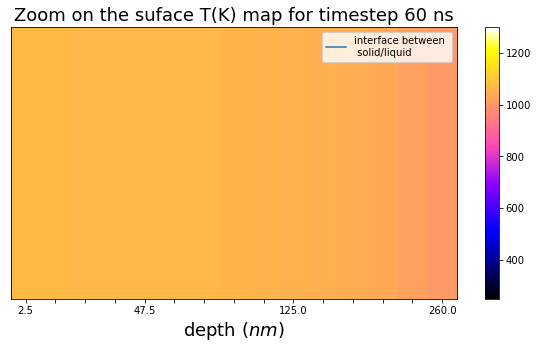

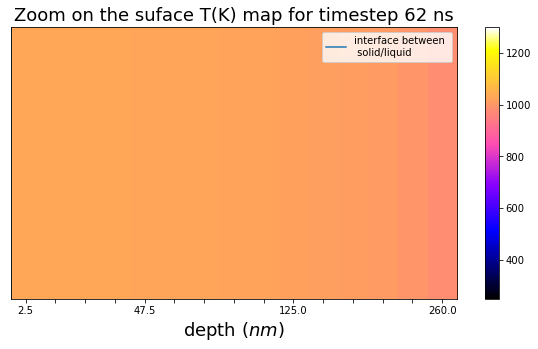

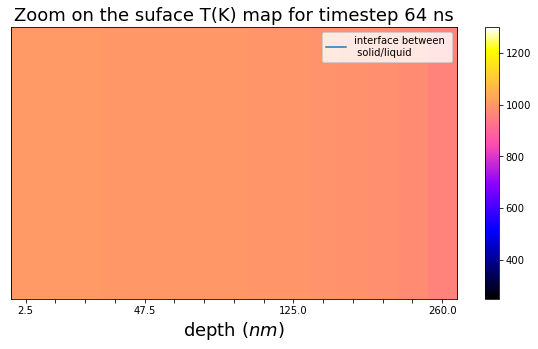

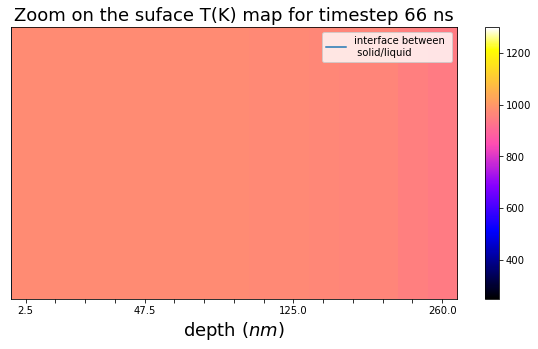

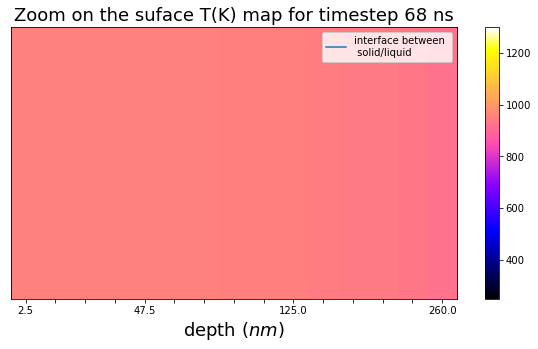

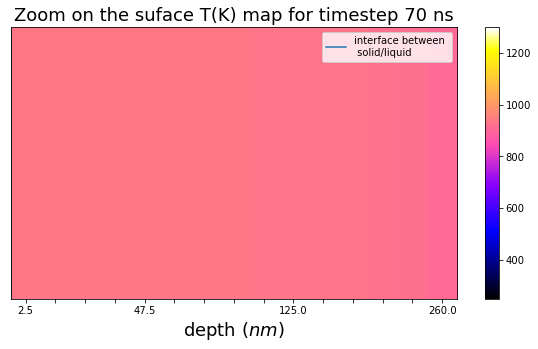

In [10]:
#nanometers
x = [25*0.1,' ',' ',' ',475*0.1,' ',' ',' ',' ',1250*0.1,' ',' ',' ',' ',2600*0.1]
X=data[:,:]
times=[]
for i in range(1,len(X[0,:])):
    t=(i-1)*timestep
    times.append(t)
    fig = plt.figure( figsize=(10, 5))
    y = data[:15,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y, cmap='gnuplot2', vmin=250, vmax=maxTempReached,aspect='auto')
    depth=tdepth[i-1][1]*0.01
    plt.ylim(0,1)
    x1, y1 = [depth-0.5,depth-0.5],[0,1]
    plt.plot(x1, y1, label='interface between \n solid/liquid')
    plt.title('Zoom on the suface T(K) map for timestep %i ns' %t,fontsize=18)
    plt.colorbar(imagetoplot, orientation='vertical')
    plt.xlabel('depth ($nm$)',fontsize=18)
    plt.gca().set_xticks(np.arange(len(x)))
    plt.gca().set_xticklabels(x)
    plt.legend()
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
#   plt.savefig('plot %i ns' %t)
    plt.show()

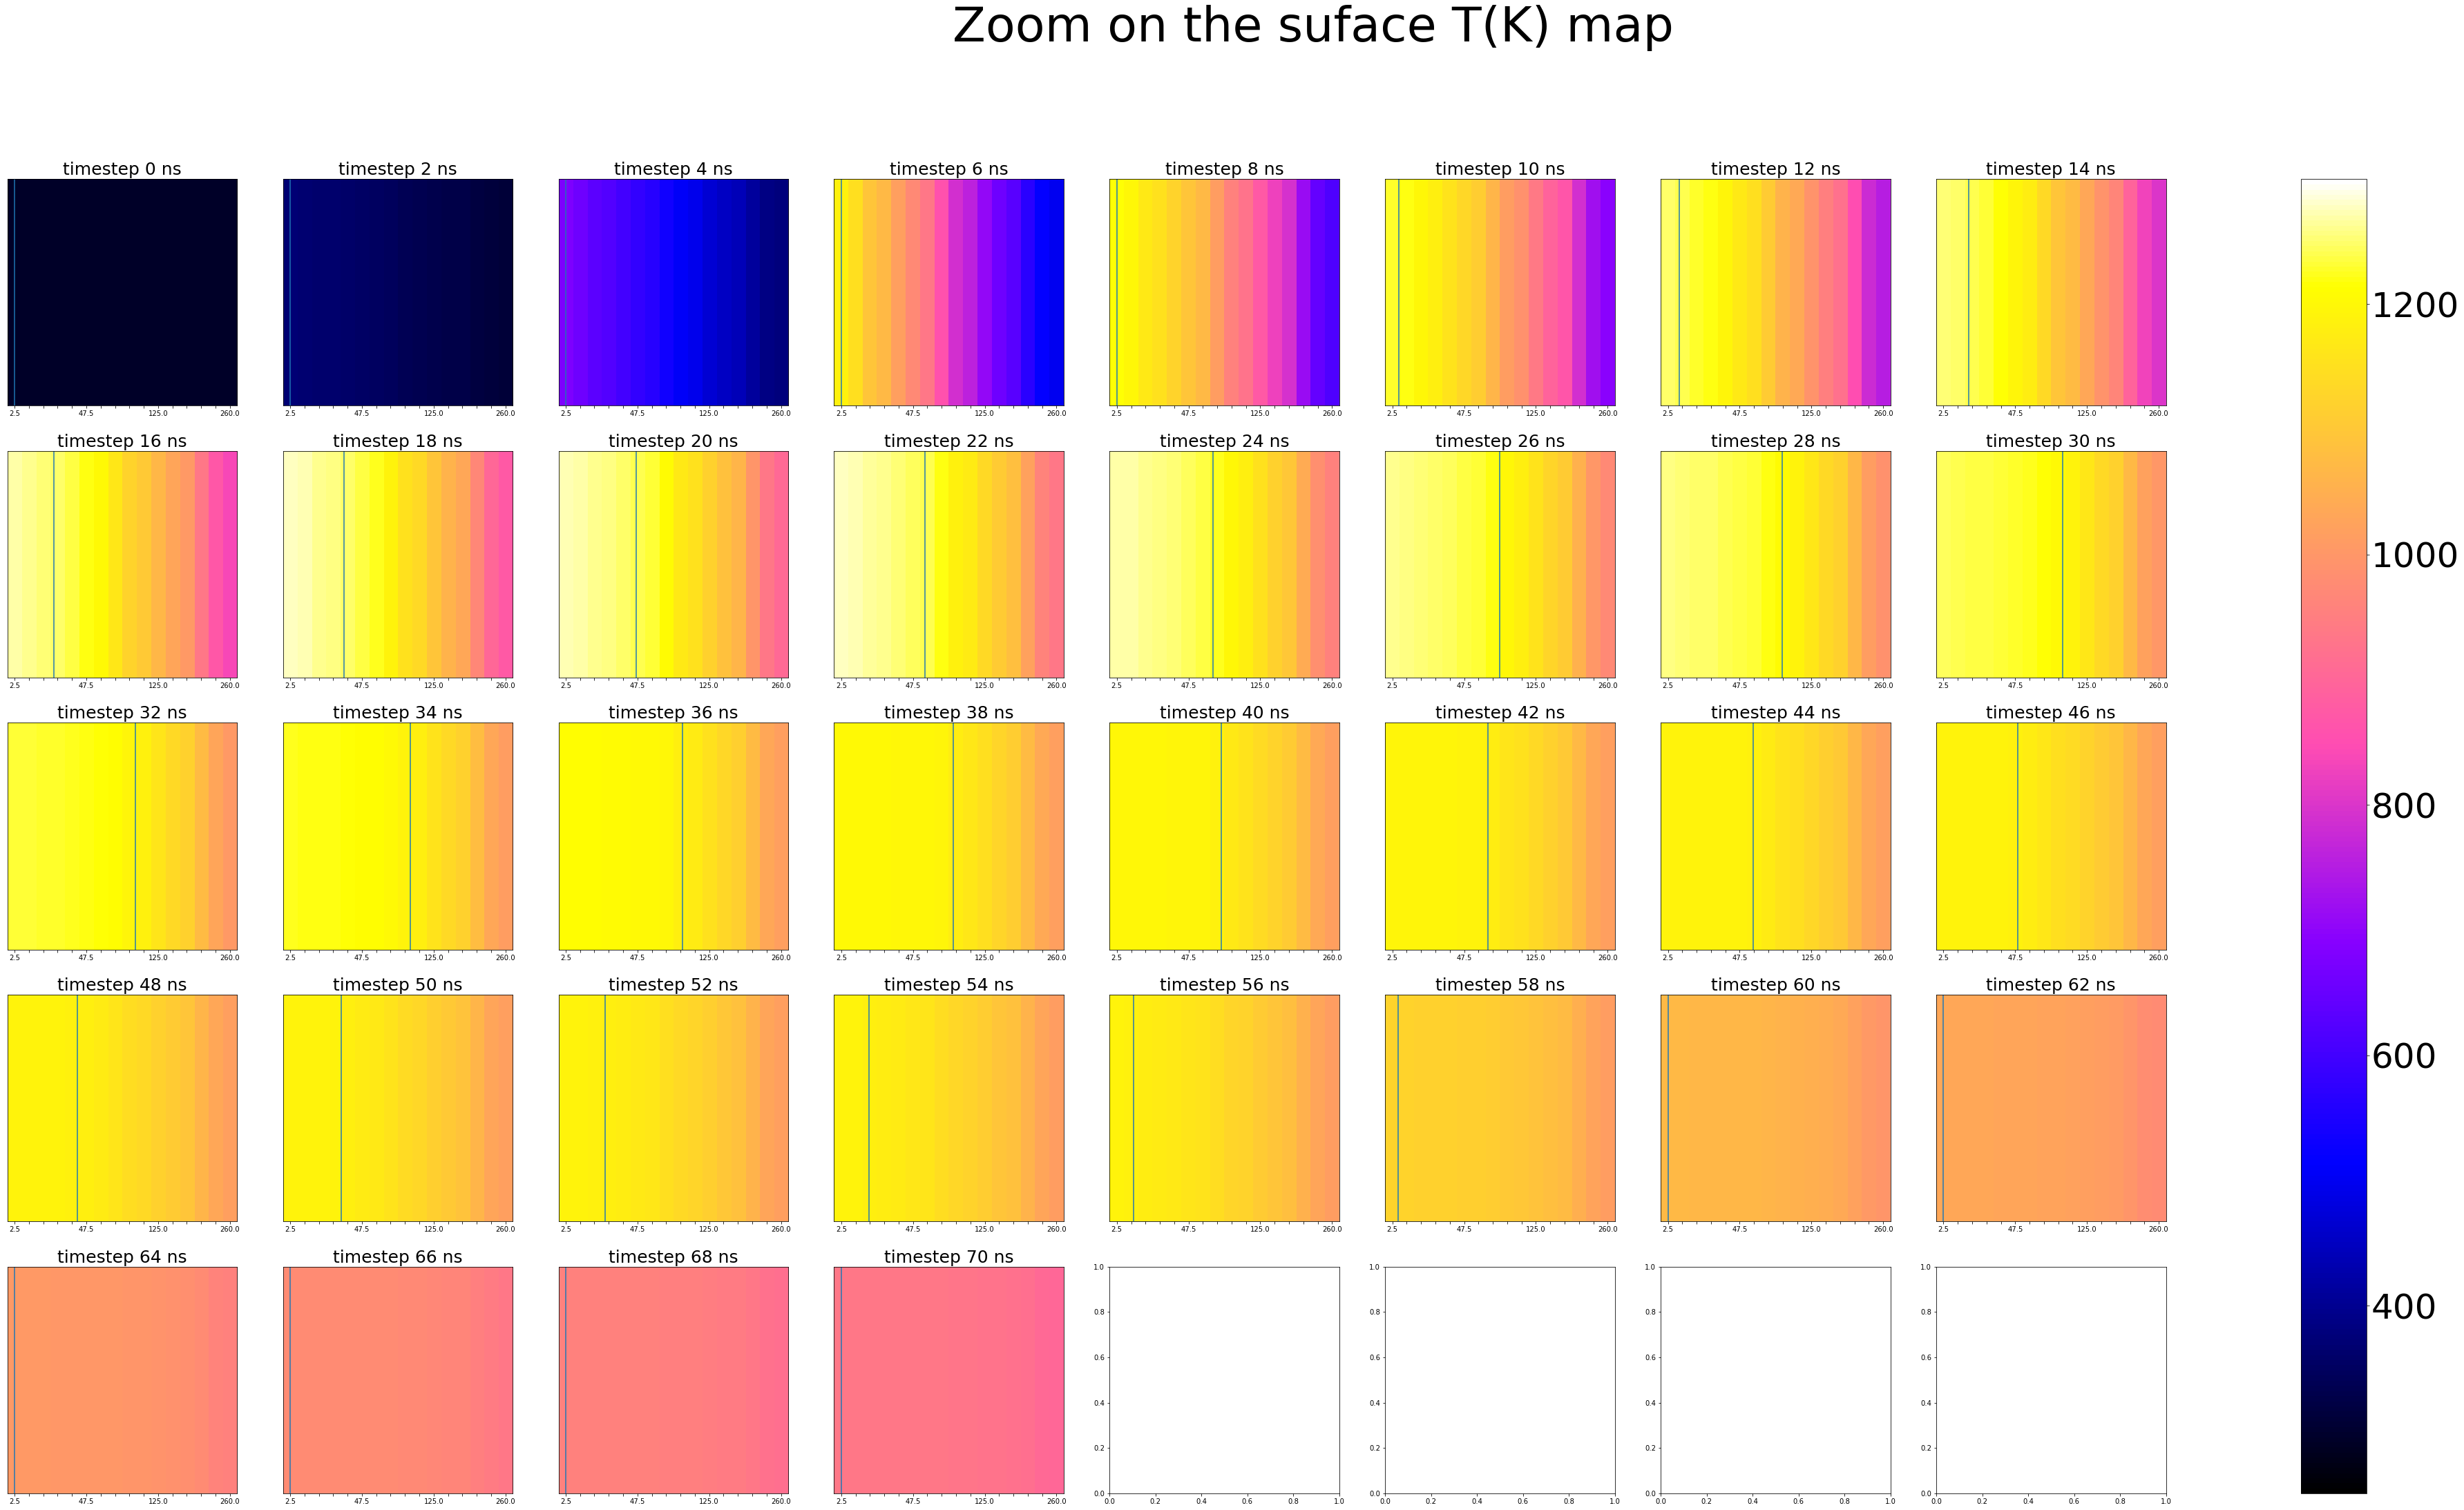

In [313]:
#nanometers
x = [25*0.1,' ',' ',' ',' ',475*0.1,' ',' ',' ',' ',1250*0.1,' ',' ',' ',' ',2600*0.1]
X=data[:,:]
times=[]
n_cols=int(len(X[0,:])/5)
fig, ax = plt.subplots(5, n_cols+1, figsize=(70,35))
plt.suptitle('Zoom on the suface T(K) map', fontsize=70)
ax = ax.ravel()

for i in range(0,len(X[0,:])-1):
    t=(i)*timestep
    times.append(t)
    y = data[:16,i+1]
    Y=np.vstack((y,y))
    imagetoplot=ax[i].imshow(Y, cmap='gnuplot2', vmin=250, vmax=maxTempReached,aspect='auto')
    depth=tdepth[i-1][1]*0.01 #if timestep 2 set [i+1] if timestep 5 set [i]
    ax[i].set_ylim(0,1)
    x1, y1 = [depth,depth],[0,1]
    ax[i].set_title('timestep %i ns' %t,fontsize=25)
    ax[i].plot(x1, y1, label='interface between \n solid/liquid')
    ax[i].set_xticks(np.arange(len(x)))
    ax[i].set_xticklabels(x)
    ax[i].yaxis.set_major_locator(ticker.NullLocator())
cbar=fig.colorbar(imagetoplot, orientation='vertical',ax=ax)
cbar.ax.tick_params(labelsize=50)
fig.savefig('zoomplot%i_mJ'  %energy_impulse)

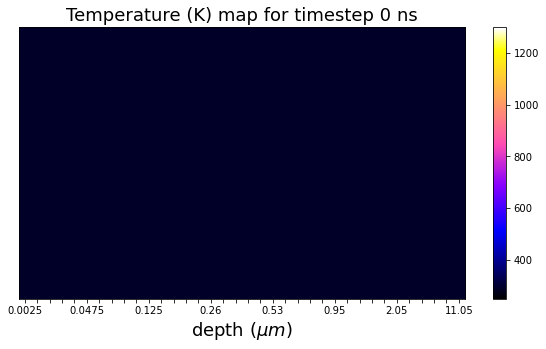

In [11]:
x_n = data[:,0]
#mircometers
x = [25*0.0001,' ',' ',' ',' ',475*0.0001,' ',' ',' ',' ',1250*0.0001,' ',' ',' ',' ',2600*0.0001,' ',' ',' ',' ',5300*0.0001,' ',' ',' ',' ',round(9500*0.0001,2),' ',' ',' ',' ',round(20500*0.0001,2),' ',' ',' ',' ',110500*0.0001] 
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
plt.colorbar(imagetoplot, orientation='vertical')
def AnimationLaserMelting(i):
    i=i+1
    t=(i-1)*timestep
    y = data[:,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y, cmap='gnuplot2', vmin=250, vmax=maxTempReached, aspect='auto')
    plt.title('Temperature (K) map for timestep %i ns' %t,fontsize=18)
    plt.xticks(np.arange(len(x_n)),x)
    plt.xlabel('depth ($\mu m$)',fontsize=18)
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
f=len(X[0,:])-2
animator = ani.FuncAnimation(fig, AnimationLaserMelting, f, interval = 200)
   
animator.save(r'globalsampleLaserMelting_%i_mJ.mp4' %energy_impulse)



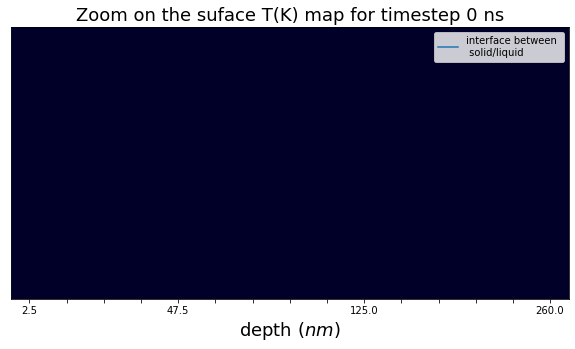

In [12]:
#nanometers
x = [25*0.1,' ',' ',' ',475*0.1,' ',' ',' ',' ',1250*0.1,' ',' ',' ',' ',2600*0.1]
X=data[:,:]

fig1 = plt.figure( figsize=(10, 5))
def ZoomLaserMelting(i):
    plt.clf()
    t=(i)*timestep
    y = data[:15,i+1]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y, cmap='gnuplot2', vmin=250, vmax=maxTempReached,aspect='auto')
    depth=tdepth[i-1][1]*0.01
    plt.ylim(0,1)
    x1, y1 = [depth-0.5,depth-0.5],[0,1]
    plt.plot(x1, y1, label='interface between \n solid/liquid')
    plt.title('Zoom on the suface T(K) map for timestep %i ns' %t,fontsize=18)
    plt.xlabel('depth ($nm$)',fontsize=18)
    plt.gca().set_xticks(np.arange(len(x)))
    plt.gca().set_xticklabels(x)
    plt.legend()
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
f1=len(X[0,:])-1
animator1 = ani.FuncAnimation(fig1, ZoomLaserMelting, f1, interval = 200)
   
animator1.save(r'zoomLaserMelting_%i_mJ.mp4'  %energy_impulse)

# for professor's project

In [81]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [97]:
def curly_arrow(start, end, arr_size = 1, n = 5, col='y', linew=1., width = 0.1):
    xmin, ymin = start
    xmax, ymax = end
    dist = np.sqrt((xmin - xmax)**2 + (ymin - ymax)**2)
    n0 = dist / (2 * np.pi)

    x = np.linspace(0, dist, 151) + xmin
    y = width * np.sin(n * x / n0) + ymin
    line = plt.Line2D(x,y, color=col, lw=linew)

    del_x = xmax - xmin
    del_y = ymax - ymin
    ang = np.arctan2(del_y, del_x)

    line.set_transform(mpl.transforms.Affine2D().rotate_around(xmin, ymin, ang) + plt.gca().transData)
    plt.gca().add_line(line)

    verts = np.array([[0,1],[0,-1],[2,0],[0,1]]).astype(float) * arr_size
    verts[:,1] += ymax
    verts[:,0] += xmax
    path = mpath.Path(verts)
    patch = mpatches.PathPatch(path, fc=col, ec=col)

    patch.set_transform(mpl.transforms.Affine2D().rotate_around(xmax, ymax, ang) + plt.gca().transData)
    return patch

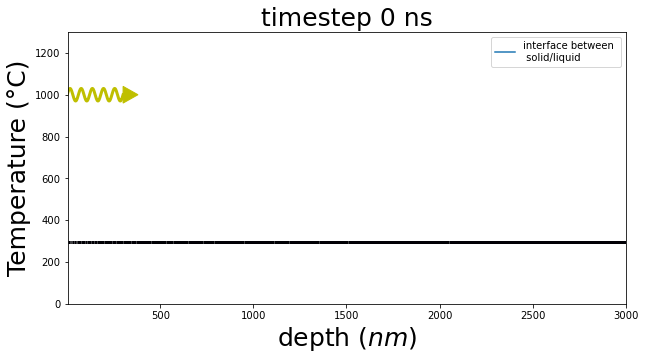

In [110]:
data = np.loadtxt(filename1)
x = data[:,0]*0.1
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
def Melting(i):
    plt.clf()
    y = data[:,i+1]
    z = data[:,i+1]
    depth=tdepth[i-1][1]*0.1
    t=(i)*timestep
    x1, y1 = [depth,depth],[0,maxTempReached]
    plt.plot(x1, y1, label='interface between \n solid/liquid')
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='magma',norm=matplotlib.colors.Normalize(vmin=290, vmax=maxTempReached))
    lc.set_array(z)
    lc.set_linewidth(3)
    line = plt.gca().add_collection(lc)
    plt.ylim(0,maxTempReached)
    plt.xlim(x.min(), 3000)
    plt.gca().add_patch(curly_arrow((0, 1000), (300, 1000), arr_size=40, n=5, linew=3, width=30))
    plt.title('timestep %i ns' %t,fontsize=25)
    plt.xlabel('depth ($n m$)', fontsize=25)
    plt.ylabel('Temperature (°C)', fontsize=25)
    plt.legend()
f=len(X[0,:])-1  
animator = ani.FuncAnimation(fig, Melting, f, interval = 200)
   
animator.save(r'Project_Video.mp4')